1.0898731041456018
5.0
62.98115


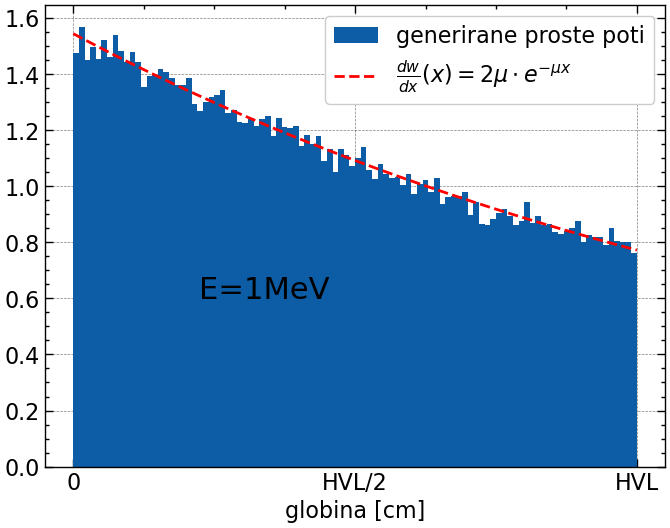

(0.0, 1.5707963267948966)
(6.138067651794184, 2.070112168918336)


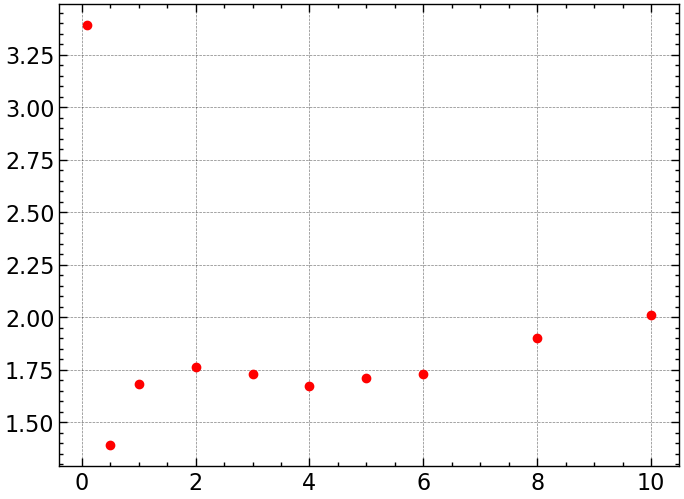

mfp=2.0623999736012806 cm
mfp_com=4.4542834616909355 cm
mfp_fe=69.75908699306943 cm

------------- foton # 1----------

   -----compton-(interaction #1)---
s_int=3.926279050338931<4.999999999999999=lam
eps=0.3073979277909103
th_cs,phi_cs=(27.45858308325433, 285.9214718554265)
omega=[ 0.88734438  0.12649078 -0.44341857]
r0_new=[3.92627905e+00 3.92627905e-13 3.92627905e-13]; dir_new=(8.112845322235819, 116.32220384077553)

   ---escape---
s_int=3.387714564995031>1.2100385958027886=lam; (#pl=1)
E_out = 1.5369896389545514

------------- foton # 2----------

   ---escape---
s_int=10.352062500650385>4.999999999999999=lam; (#pl=1)
E_out = 5

------------- foton # 3----------

   -----compton-(interaction #1)---
s_int=1.8098910032315785<4.999999999999999=lam
eps=0.135809718649389
th_cs,phi_cs=(47.012574556164694, 275.52352625799006)
omega=[ 0.68183784  0.07041046 -0.72810681]
r0_new=[1.809891e+00 1.809891e-13 1.809891e-13]; dir_new=(5.895791109085902, 136.72791552124062)

   -----compton-(inte

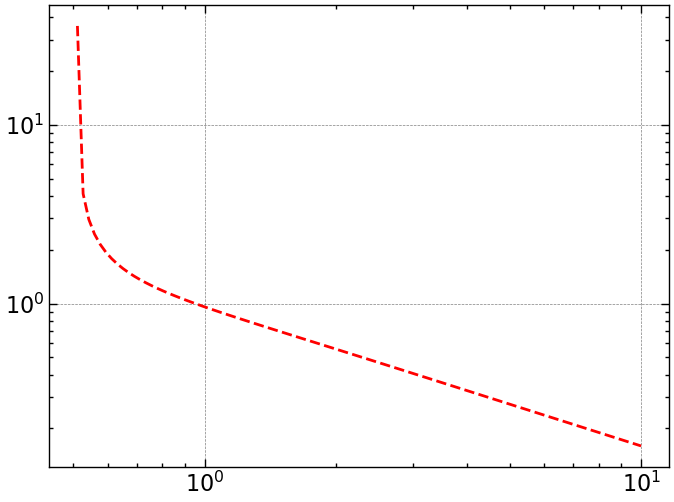

  -------------------start of simulation----------
E0=1 MeV; n_hvl = 7.4 (mu*d = 5.129); N_sim=3.0e+00; w_min = 0.001
   ----photon # 0----
w=0.9940792321620687; forcing first interaction
-> int=compton
w=0.7295954146972231; forcing CS/TP
-> int=compton
w=0.39754366624942544; forcing CS/TP
-> int=compton
w=0.04896046176331833; forcing CS/TP
-> int=compton
w=0.001468428938222777; forcing CS/TP
-> int=compton
w=2.8666215101704697e-05; forcing CS/TP
ABSORPTION; weight < w_min (E_current= 0.10416239007596889 MeV)
   ----photon # 1----
w=0.9940792321620687; forcing first interaction
-> int=compton
w=0.7295954146972231; forcing CS/TP
-> int=compton
w=0.17273655251518746; forcing CS/TP
-> int=compton
w=0.011968158674609384; forcing CS/TP
-> int=compton
w=0.0007879044323664088; forcing CS/TP
ABSORPTION; weight < w_min (E_current= 0.17621134078672906 MeV)
   ----photon # 2----
w=0.9940792321620687; forcing first interaction
-> int=compton
w=0.7295954146972231; forcing CS/TP
-> int=compton
w=0.0

C:\Users\Admin\AppData\Local\Temp\ipykernel_5816\1084886018.py:13: RuntimeWarning: divide by zero encountered in log
  print(i, np.log(i)*i/(i-1))
C:\Users\Admin\AppData\Local\Temp\ipykernel_5816\1084886018.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  print(i, np.log(i)*i/(i-1))
C:\Users\Admin\AppData\Local\Temp\ipykernel_5816\1084886018.py:13: RuntimeWarning: invalid value encountered in scalar divide
  print(i, np.log(i)*i/(i-1))


NameError: name 'PhotonSimulation_FE_CS_TP' is not defined

NameError: name 'PhotonSimulation_FE_CS_TP' is not defined

In [1]:
import nbimporter
#import functions
%run ./functions.ipynb


In [13]:
#%%  simulacijska koda - brez TP
def PhotonSimulation(E0,N_simulated,cuboid,E_min):
    # dimenzije svinčenega kvadra
    d, a, b = cuboid
    # parameter alfa
    alfa0 = E0/0.511
    # ''tallies''
    E_out = np.zeros(6)  # matrika, ki zbira, koliko energije zapusti Pb v določeni ploskvi
    E_abs = 0    # absorbed energy
    interactions = ['compton','fe']  # tipi interakcij, ki jih upoštevamo
    #ac_fe, ac_compton = 
    for i in range(N_simulated):
        # začetna energija, lega in smer
        # foton-karakteriskike: E_current, r0, direction=(phi,theta) [KJE JE, KAM GRE, kakšno energijo ima]
        r0 = np.array([float(0),0,0]) # začetna lokacija = (0,0,0)
        omega = np.array([1,1/10**13,1/10**13])  # začetna smer
        #direction = (0,np.pi/2) # = (theta, phi) 
        direction = Cartesian_to_spherical(omega)  # = (theta, phi)
        E_current = E0  # trenutna energija fotona 
        alfa_current = E0 / 0.511
        
        while True:    
            # možna dolžina poti in ploskev izstopa
            lam, ploskev = PathToExit(d,a,b,r0,direction)
            
            # dolžina proste poti in interakcija
            s_com, s_fe = InteractionLength(E_current,E_gamma,AC_compton), InteractionLength(E_current,E_gamma,AC_fe)
            s_int, int_type = min(s_com,s_fe), interactions[np.argmin([s_com,s_fe])]
            
            # gre foton ven ali interagira?
            if s_int > lam:
                E_out[ploskev] += E_current
                break
            else:
                # fotoefekt ali prenizka energija -> ABSORPCIJA
                if int_type == 'fe' or E_current<E_min:
                    E_abs += E_current
                    break
                # Comptonsko sipanje -> sprememba r0, E_current, smer=direction
                elif int_type == 'compton':                    
                    # eps = E'/E, comptonska kota
                    eps = ComptonEnergyGenerator(E_current)
                    th_cs = np.arccos(1 - (1-eps)/(alfa_current*eps))
                    phi_cs = UNFM(0,2*np.pi)
                    # nov položaj, energija in abs energija                
                    r0 += omega * s_int
                    E_abs += E_current * (1-eps)
                    E_current *= eps
                    alfa_current *= eps
                    # nova smer
                    omega = DirectionAfterCompton(direction,th_cs,phi_cs)                    
                    direction = Cartesian_to_spherical(omega)                    
                    
    return E_out, E_abs 

#np.random.seed(1238)
#N_simulated = 1
#PhotonSimulation(E0,N_simulated,cuboid,E_min=E_gamma[0])

In [14]:
#%% Simulacija - določanje/luščenje parametrov, analiza, časovna zahtevnost... 

########## ista koda, z dodatkom TP, je čist spodej in jo uporablam za analizo!!!

   # SEED
#np.random.seed(76490)

   # izbira pogojev
#N_simulated = [3,5,10,100,300,1000,1500,3000,10**4][8]
N_simulated = 10**4
E0 = 1  # MeV
print(f'   ----Initial energy: {E0} MeV ------')
print(f'N_simulated={N_simulated}')
   # debelina (thickness) svinca
#depth = 10  # cm
AC_used = [AC_tot,AC_wo_coh,AC_compton+AC_fe][2]  # logična izbira je zadnja!!
ac_tot = AC_interpolation(E0,E_gamma,AC_used)
mfp = 1/ ac_tot
print(f'MFP = {np.round(mfp,4)} cm')
N_mfp = 3   # debelina v enotah mfp-jev!!
depth = np.round(N_mfp * mfp,4)
Thickness = np.round(ac_tot * depth,4)
print(f'thickness (ac*d) = {depth} cm [{Thickness} MFP] \n')

a = 10 * mfp   # stranica - v enotah mfp je lepše;  10mfp je praktično neskončna
               # stena v y in z smeri!!!  --> za a<<<mfp dobiš narrow-beam - glej spodaj!!!
cuboid = (depth,a,a)  # (d,a,b)

           # simulacija
Ts = time.time()
EscapedEnergy, AbsorbedEnergy = PhotonSimulation(E0,N_simulated,cuboid,E_min=E_gamma[0])
   # časovna zahtevnost
print(f'time of simulation: {time.time() - Ts} s')
    # energija: absorpcija in izhod energije skozi vse stene
print(f'escaped energy: {EscapedEnergy}')
print(f'absorbed energy: {AbsorbedEnergy}')

# build-up
     # Z UPOSTEVANJEM, DA NI KOHERENTNEGA SIPANJA, DOBIM PRAVILEN REZULTAT ZA 
     # a<<< 1; torej ''narrow beam geometry'' !!!!!
#ac_tot = AC_interpolation(E0,E_gamma,AC_tot)  # s koherentnim
       
E_pred = N_simulated * E0 * np.exp(-Thickness)
E_pred
BuildUp = EscapedEnergy[1] / E_pred
print(f'Build-up= {BuildUp:.4f}')


#%% Build-up factor function
def BuildUpFactor(E_det,E0,N,thickness):
    E_pred = N * E0 * np.exp(-thickness)
    B = E_det / E_pred
    #return f'Build-up= {B:.4f}'
    return float(f'{B:.4f}')


   ----Initial energy: 1 MeV ------
N_simulated=10000
MFP = 1.2951 cm
thickness (ac*d) = 3.8853 cm [3.0 MFP] 

time of simulation: 2.529996156692505 s
escaped energy: [ 24.43931766 858.11649745   0.           0.           0.
   0.        ]
absorbed energy: 9117.444184885317
Build-up= 1.7236


In [3]:
#%% 1a) skupna (ena!!!) funckija s TP
def PhotonSimulation_FE_CS_TP(E0,N_simulated,cuboid,E_min=0.001,beam_type='point'):
    # dimenzije svinčenega kvadra
    d, a, b = cuboid
    # parameter alfa
    alfa0 = E0/0.511
    # ''tallies''
    E_out = np.zeros(6)  # matrika, ki zbira, koliko energije zapusti Pb v določeni ploskvi
    E_abs = 0    # absorbed energy
    interactions = ['compton','fe','tp']  # tipi interakcij, ki jih upoštevamo
    directions_tp = []
    locations_tp = []
    N_esc,N_fe,N_com,N_pp =0, 0, 0, 0

    for i in range(N_simulated):
        # začetna energija, lega in smer
        # foton-karakteriskike: E_current, r0, direction=(phi,theta) [KJE JE, KAM GRE, kakšno energijo ima]
        if beam_type == 'point':
            r0 = np.array([float(0),0,0]) # začetna lokacija = (0,0,0)
        elif beam_type == 'plane':
            r0 = np.array([float(0),UNFM(-a/2,a/2),UNFM(-b/2,b/2)])
        else:
            return 'error: wrong beam type'
        omega = np.array([1,1/10**13,1/10**13])  # začetna smer
        #direction = (0,np.pi/2) # = (theta, phi) 
        direction = Cartesian_to_spherical(omega)  # = (theta, phi)
        E_current = E0  # trenutna energija fotona 
        alfa_current = E0 / 0.511
        int_tp = 0
        
        while True:    
            # možna dolžina poti in ploskev izstopa
            lam, ploskev = PathToExit(d,a,b,r0,direction)
            
            # dolžina proste poti in interakcija
            s_com, s_fe, s_tp = InteractionLength(E_current,E_gamma,AC_compton), \
            InteractionLength(E_current,E_gamma,AC_fe), InteractionLength(E_current,E_gamma,AC_tp)
            s_int, int_type = min(s_com,s_fe, s_tp), interactions[np.argmin([s_com,s_fe,s_tp])]
            
            # gre foton ven ali interagira?
            if s_int > lam:
                E_out[ploskev] += E_current
                if E_current == E0:
                    N_esc += 1
                break
            else:        
                # fotoefekt ali prenizka energija -> ABSORPCIJA
                if int_type == 'fe' or E_current<E_min:
                    E_abs += E_current
                    N_fe += 1
                    break
                # Comptonsko sipanje -> sprememba r0, E_current, smer=direction
                elif int_type == 'compton':                    
                    N_com += 1
                    # eps = E'/E, comptonska kota
                    eps = ComptonEnergyGenerator(E_current)
                    th_cs = np.arccos(1 - (1-eps)/(alfa_current*eps))
                    phi_cs = UNFM(0,2*np.pi)
                    # nov položaj, energija in abs energija                
                    r0 += omega * s_int
                    E_abs += E_current * (1-eps)
                    E_current *= eps
                    alfa_current *= eps
                    # nova smer
                    omega = DirectionAfterCompton(direction,th_cs,phi_cs)                    
                    direction = Cartesian_to_spherical(omega)                    
                elif int_type== 'tp':
                    N_pp += 1
                    E_abs += E_current - 1.022
                    r0 += omega * s_int
                    E_current = 0.511 
                    direction = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
                    omega = Spherical_to_cartesian(direction)
                    alfa_current = 1
                    # zbiranje podatkov za novo simulacijo anihilacijskih žarkov
                    dir0 = direction[0] + np.pi if direction[0]<np.pi else direction[0] - np.pi
                    dir1 = np.pi - direction[1]
                    directions_tp.append([dir0,dir1])
                    locations_tp.append(r0)

    # simulacija ostalih anihilacijskih fotonov
    interactions_tp = ['compton','fe']
    for i in range(len(locations_tp)):
        # foton-karakteriskike: E_current, r0, direction=(phi,theta) [KJE JE, KAM GRE, kakšno energijo ima]
        r0 = locations_tp[i] # začetna lokacija
        direction = directions_tp[i]
        omega = Spherical_to_cartesian(direction)  # začetna smer
        E_current = 0.511 # trenutna energija fotona 
        alfa_current = 1
        
        while True:    
            # možna dolžina poti in ploskev izstopa
            lam, ploskev = PathToExit(d,a,b,r0,direction)
            
            # dolžina proste poti in interakcija
            s_com, s_fe = InteractionLength(E_current,E_gamma,AC_compton), \
            InteractionLength(E_current,E_gamma,AC_fe)
            s_int, int_type = min(s_com,s_fe), interactions_tp[np.argmin([s_com,s_fe])]
            
            # gre foton ven ali interagira?
            if s_int > lam:
                E_out[ploskev] += E_current
                #if E_current == E0:
                    #N_esc += 1
                break
            else:
                
                # fotoefekt ali prenizka energija -> ABSORPCIJA
                if int_type == 'fe' or E_current<E_min:
                    E_abs += E_current
                    #N_fe += 1
                    break
                # Comptonsko sipanje -> sprememba r0, E_current, smer=direction
                elif int_type == 'compton':                    
                    #N_com += 1
                    # eps = E'/E, comptonska kota
                    eps = ComptonEnergyGenerator(E_current)
                    th_cs = np.arccos(1 - (1-eps)/(alfa_current*eps))
                    phi_cs = UNFM(0,2*np.pi)
                    # nov položaj, energija in abs energija                
                    r0 += omega * s_int
                    E_abs += E_current * (1-eps)
                    E_current *= eps
                    alfa_current *= eps
                    # nova smer
                    omega = DirectionAfterCompton(direction,th_cs,phi_cs)                    
                    direction = Cartesian_to_spherical(omega)    
                    
    N_int = np.array([N_fe,N_com,N_pp,N_esc])
    return E_out, E_abs


E0 = 2
N_sim = 10**3
cuboid = (5,10,10)
PhotonSimulation_FE_CS_TP(E0,N_sim,cuboid)


(array([ 12.19568327, 255.22431595,   0.        ,   0.        ,
          0.        ,   0.        ]),
 1732.5800007738146)

In [4]:
#%% 1b) spremenjena simulacijska koda + english - chatgpt discussion
def PhotonSimulation_normal(E0,N_simulated,n_hvl,E_min=0.001,beam_type='point'):
    print(f'----START SIMULATION; E0={E0},N_sim={N_simulated},n_hvl={n_hvl}')
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    #a = b= 10*HVL0
    # ''tallies''
    E_out = np.zeros(6)  # matrix of all 6 faces of cuboid shield - collect escaped energies through each
    E_abs = 0    # absorbed energy in shield (photoeffect, scattering...)
    interactions = ['compton','fe','tp']  # interaction types, taken into consideration
    directions_tp = []
    locations_tp = []
    #N_esc,N_fe,N_com,N_pp =0, 0, 0, 0
    n_lost,n_bs, n_abs = 0,0,0  # count absorbed and escaped photons!
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right = 0
    n_cs,n_pp = 0,0

    for i in range(N_simulated):
        N_print = int(np.floor(N_simulated/20))
        if (i+1)% N_print == 0:
            #print('yep')
            print('simulating {}-th primary photon ({}% done); t_sim={}'.format(i+1,np.round(100*(i+1)/N_simulated,0),time.time()-T_start))
        # photon: loc=r0, dir=omega,energy=E_current
        if beam_type == 'point':
            r0 = np.array([float(0),0,0]) # starting location = (0,0,0)
        elif beam_type == 'plane':
            r0 = np.array([float(0),UNFM(-a/2,a/2),UNFM(-b/2,b/2)])
        else:
            return 'error: wrong beam type'
        
        omega = np.array([1,1/10**13,1/10**13])  # starting direction
        direction = Cartesian_to_spherical(omega)  # = (theta, phi)
        E_current = E0  # current photon energy
        # parameter alpha = E/mc^2
        alfa_current = E0 / 0.511
        
        while True:    
            # lam = path to surface, ploskev = side of cuboid, at which photon would exit
            lam, ploskev = PathToExit(d,a,b,r0,direction)
            
            # s_int = path to interaction + draw interaction type
            s_com, s_fe, s_tp = (InteractionLength(E_current,E_gamma,AC_compton),  
                                 InteractionLength(E_current,E_gamma,AC_fe),
                                 InteractionLength(E_current,E_gamma,AC_tp)
            )
            s_int, int_type = (min(s_com,s_fe, s_tp),
                               interactions[np.argmin([s_com,s_fe,s_tp])]
            )
            
            # interaction or escape?
            if s_int > lam:
                #n_esc += 1
                E_out[ploskev] += E_current
                if ploskev == 1:
                    n_esc_right += 1
                elif ploskev==0:
                    n_bs += 1
                elif ploskev != 1 and ploskev != 0:
                    n_lost += 1
                if E_current == E0:
                    n_esc_prim += 1
                break
            else:        
                # photoefect or to low photon energy -> ABSORPTION
                if int_type == 'fe' or E_current<E_min:
                    n_abs += 1
                    E_abs += E_current
                    break
                # Compton -> change of r0, E_current, direction
                elif int_type == 'compton':    
                    n_cs += 1                
                    # eps = E'/E, new location, direction, energy 
                    eps = ComptonEnergyGenerator(E_current)
                    th_cs = np.arccos(1 - (1-eps)/(alfa_current*eps))
                    phi_cs = UNFM(0,2*np.pi)               
                    r0 += omega * s_int
                    # assumption: all kinetic energy of electron is localy absorbed
                    E_abs += E_current * (1-eps)
                    E_current *= eps
                    alfa_current *= eps
                    # new direction
                    omega = DirectionAfterCompton(direction,th_cs,phi_cs)                    
                    direction = Cartesian_to_spherical(omega)                    
                elif int_type== 'tp':
                    n_pp += 1
                    # both el. and positron localy transmit energy
                    E_abs += E_current - 1.022
                    r0 += omega * s_int
                    # positron creates 2 anihilation photons at 511 keV
                    E_current = 0.511 
                    direction = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
                    omega = Spherical_to_cartesian(direction)
                    alfa_current = 1
                    # direction of second photon is opposite of the direction of the 
                    # first one, collect directions from all pair prodiction events
                    # to simulate all 'second' photons later in code (look below) 
                    dir_phi = direction[0] + np.pi if direction[0]<np.pi else direction[0] - np.pi
                    dir_th = np.pi - direction[1]
                    directions_tp.append([dir_phi,dir_th])
                    locations_tp.append(r0)

    # simulation of the second anihilation photons
    interactions_tp = ['compton','fe']
    N_pp = len(locations_tp)
    for i in range(N_pp):
        N_pp_print = int(np.floor(N_pp/5))
        if (i+1)% N_pp_print == 0:
            print('simulating {}-th annihilation photon ({}% done); t_sim={}'.format(i+1,np.round(100*(i+1)/len(locations_tp),0),time.time()-T_start))
        r0 = locations_tp[i] # start location
        direction = directions_tp[i]
        omega = Spherical_to_cartesian(direction)  # start direction
        E_current = 0.511 # same for all (positron anihilation happens at rest - assumption)
        alfa_current = 1
        
        # below same as in first part of simulation, exept energy to low for another
        # pair production to occur - only PE and CS
        while True:    
            lam, ploskev = PathToExit(d,a,b,r0,direction)
            s_com, s_fe = InteractionLength(E_current,E_gamma,AC_compton), \
            InteractionLength(E_current,E_gamma,AC_fe)
            s_int, int_type = min(s_com,s_fe), interactions_tp[np.argmin([s_com,s_fe])]
            
            if s_int > lam:
                E_out[ploskev] += E_current
                break
            else:
                # i) ABSORPTION
                if int_type == 'fe' or E_current<E_min:
                    E_abs += E_current
                    break
                # ii) SCATTERING
                elif int_type == 'compton':                    
                    # eps = E'/E
                    eps = ComptonEnergyGenerator(E_current)
                    th_cs = np.arccos(1 - (1-eps)/(alfa_current*eps))
                    phi_cs = UNFM(0,2*np.pi)                
                    r0 += omega * s_int
                    E_abs += E_current * (1-eps)
                    E_current *= eps
                    alfa_current *= eps
                    omega = DirectionAfterCompton(direction,th_cs,phi_cs)                    
                    direction = Cartesian_to_spherical(omega)    
                    
    #N_int = np.array([N_fe,N_com,N_pp,N_esc])
    
    # check clock
    t_simulation = time.time() - T_start
    # calculate biuldup factor
    E_out_theory = N_simulated * E0 * 2**(-n_hvl)
    buildup = E_out[1] / E_out_theory
    # expected primaries to escape 
    n_esc_prim_th = np.round(n_sim * 2**(-n_hvl),1)
    
    events_report = {'n_esc_prim':n_esc_prim,'n_esc_right':n_esc_right,'n_bs':n_bs,'n_lost':n_lost,'n_abs':n_abs,'n_cs':n_cs,'n_pp':n_pp}

    # alternativna opcija za output!
    res = {
        'buildup':buildup,
        'E_out':E_out,
        'E_abs':E_abs,
        't_simulation':t_simulation,
        #'escaped (all, on right)': [[n_esc,n_esc_right]],
        'esc prim (meas,theory)': [n_esc_prim,n_esc_prim_th], 
        'n_abs':n_abs,
        'events report': events_report
        }
    return res

    # return abrorbed energy and matrix of escaped energies through every face of shield
    #return E_out, E_abs, buildup, t_simulation, [[n_esc,n_esc_right], [n_esc_prim,n_esc_prim_th], n_abs]

# example of simulation
E0 = 2
n_sim = 10**4
n_hvl = 5
res = PhotonSimulation_normal(E0,n_sim,n_hvl)
print(f'result: {res}')
print(res['events report'])
print(f'B={res['buildup']}')
#print()



----START SIMULATION; E0=2,N_sim=10000,n_hvl=5
   ----dimensions: ac0=0.5142;hvl0=1.3481;d=6.7406 (n_hvl*1.3481)
simulating 500-th primary photon (5.0% done); t_sim=0.3825235366821289
simulating 1000-th primary photon (10.0% done); t_sim=0.724940299987793
simulating 1500-th primary photon (15.0% done); t_sim=1.0038516521453857
simulating 2000-th primary photon (20.0% done); t_sim=1.2914817333221436
simulating 2500-th primary photon (25.0% done); t_sim=1.63740873336792
simulating 3000-th primary photon (30.0% done); t_sim=2.035858392715454
simulating 3500-th primary photon (35.0% done); t_sim=2.5011391639709473
simulating 4000-th primary photon (40.0% done); t_sim=3.0578694343566895
simulating 4500-th primary photon (45.0% done); t_sim=3.512143611907959
simulating 5000-th primary photon (50.0% done); t_sim=3.902688503265381
simulating 5500-th primary photon (55.0% done); t_sim=4.291091203689575
simulating 6000-th primary photon (60.0% done); t_sim=4.715194940567017
simulating 6500-th pr

In [71]:
# 1c) new simulation method: simulating with photon queue - development code with printing

def simulate_photon_in_cuboid(E,pos,dir,shield,w=1):
    
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)
    #s_free = InteractionLength(E,E_gamma,AC_wo_coh)
    interactions = ['cs','pe','pp']
    s_com, s_fe, s_pp = (
        InteractionLength(E,E_gamma,AC_compton),  
        InteractionLength(E,E_gamma,AC_fe), 
        InteractionLength(E,E_gamma,AC_tp)
        )
    s_free, int_type = (
        min(s_com,s_fe, s_pp),
        interactions[np.argmin([s_com,s_fe,s_pp])]
        )
    
    #### what happens?
    # i.) escape from shield
    if s_free > lam:
        print('NO INTERACTION as s_free > lam (s_free={}; lam = {})'.format(s_free,lam))
        # a) right side - contribute to dose
        if escape_side == 1:
            #print('   escape on right')
            output = {'E_out':E, 'event': 'escape on right','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            #print('   backscatter')
            output = {'E_bs':E, 'event': 'backscatter','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes through side borders of cuboid - don't contribute to dose/buildup
        else:
            #print('  lost as escapes through side edge')
            output = {'E_lost': E, 'event': 'escape on side','w':w}
    
    # ii.) interact inside layer
    else:
        print('INTERACTION HAPPENS as s_free < lam (s_free={}; lam = {})'.format(s_free,lam))
        # position change
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir':dir,'w':w,'event':int_type,'eps':eps}
            #print('COMPTON SCATTERING; photon preserves {} % of energy'.format(eps*100))

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            #dir1 = (UNFM(-1,1),UNFM(-1,1),UNFM(-1,1)) .. this is wrong, non isotropic!! - funny actually, suprisingly also, but is like that
            dir2 = - np.array(dir1)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir1':dir1,'dir2':dir2,'w':w,'event':int_type}
            #print('PAIR PRODUCTION')
       
        elif int_type=='pe':
            output = {'E_abs':E,'pos':np.copy(pos),'dir':dir,'w':w,'event':int_type}
            #print('PHOTOEFFECT - photon absorbed and terminated')
        
        else:
            print('Ops, wrong interaction type:{}'.format(int_type))

    return output

def PhotonSimulation_queue(E0,N_simulated,n_hvl,w_min=0.001,beam_type='point'):
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    shield = [d,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')

    
    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    
    ### additions ...
    #interactions = ['compton','fe','tp']  # interaction types, taken into consideration
    # directions_tp = []
    # locations_tp = []
    # #N_esc,N_fe,N_com,N_pp =0, 0, 0, 0
    #n_esc, n_abs = 0,0  # count absorbed and escaped photons!
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err = 0

    photon_queue = []

    for i in range(N_simulated):
        print('\n\n------simulating photon num {}----'.format(i))
        
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        w = 1.0  # start weight

        photon_queue.append((E,pos,dir,w))

        # count photons simulated from initial one (i-th)
        #i_ind = 0

        while photon_queue:    
            num = len(photon_queue)
            print(' ---photons to simulate (#={})--:'.format(num))
            for i in range(num):
                E,pos,dir,w = photon_queue[i]
                print('   - photon num. {}: E={},pos={},dir={},w={}'.format(i,E,pos,dir,w))

            # first photon in line - extract data
            E, pos, dir, w = photon_queue.pop(0)  # Process the first photon in the queue

            # new move
            new_photon = simulate_photon_in_cuboid(E,pos,dir,shield,w)
            w_new = new_photon['w']

            # Russian roulette for low w
            ##### IMPORTANT TO CONSIDER: what is reasonable value for w_min??? - dont want the result to depend on randomness!!! (proly 1/w_min << N_sim )
            if w < w_min:
                print('russian roulette')
                if UNFM() < w:
                    print('success')
                    w *= 1/w_min
                else:
                    print('terminated')
                    continue

            ## i) escape
            if new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out']
                print('escape on right')
                if E_photon == E0:
                    print('  (was primary photon)')
                    n_esc_prim += 1
                E_out += E_photon * w_new
            elif new_photon['event'] == 'backscatter':
                print('backsacatter')
                n_bs += 1
                E_bs += new_photon['E_bs'] * w_new
            elif new_photon['event'] == 'escape on side':
                print('escape on side')
                n_lost += 1
                E_lost += new_photon['E_lost'] * w_new

            ## ii) interaction
            elif new_photon['event'] == 'cs':
                n_cs += 1
                E_abs += new_photon['E_abs'] * w_new
                E, pos, dir, w = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['w']
                eps = new_photon['eps'] 
                photon_queue.append((E,np.copy(pos),np.copy(dir),w))
                print(f'Photon experiences Compoton scattering, preserves {eps*100} % of initial energy!')

            elif new_photon['event'] == 'pe':
                n_abs += 1
                E_abs += new_photon['E_abs'] * w_new
                print(f'Photon is absorbed via photoeffect!')

            elif new_photon['event'] == 'pp':
                n_pp += 1
                E_abs += new_photon['E_abs'] * w_new
                pos, dir1, dir2, w = new_photon['pos'], new_photon['dir1'], new_photon['dir2'], new_photon['w']
                m_el = 0.511
                photon_queue.extend([[m_el,np.copy(pos),np.copy(dir1),w],[m_el,np.copy(pos),np.copy(dir2),w]])
                print(f'Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!')

            else:
                n_err += 1
                print('Ops,wrong event type')
        
        print('-->>Finish simulating {}-th photon'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
        # check clock
    t_simulation = time.time() - T_start
    # calculate biuldup factor
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)
    E_tot_th = N_simulated * E0
    E_out_theory = E_tot_th * 2**(-n_hvl)
    #print(E_out_theory)
    buildup = E_out / E_out_theory
    events_report = {'n_esc_prim':n_esc_prim,'n_esc_right':n_esc_right,'n_bs':n_bs,'n_lost':n_lost,'n_abs':n_abs,'n_cs':n_cs,'n_pp':n_pp,'n_err':n_err}
    out= {
        'buildup':buildup,
        'E_abs':E_abs,
        'E_out':E_out,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        't_sim': t_simulation,
        'events report': events_report
    }
    
    return out


E0 = 5
N_sim = 10**1
n_hvl = 6
PhotonSimulation_queue(E0,N_sim,n_hvl)


~~~~~~~STARTING SIMULATION~~~~
Properties:E0=5,N_sim=10,n_hvl=6,w_min=0.001
   ----dimensions: ac0=0.4835;hvl0=1.4336;d=8.6014 (n_hvl*1.4336)


------simulating photon num 0----
 ---photons to simulate (#=1)--:
   - photon num. 0: E=5,pos=[0. 0. 0.],dir=[1.e+00 1.e-13 1.e-13],w=1.0
INTERACTION HAPPENS as s_free < lam (s_free=1.6592470203699976; lam = 8.601441714462311)
Photon experiences Compoton scattering, preserves 44.899562314781015 % of initial energy!
 ---photons to simulate (#=1)--:
   - photon num. 0: E=2.244978115739051,pos=[1.65924702e+00 1.65924702e-13 1.65924702e-13],dir=[ 0.87458085  0.24712335 -0.41717907],w=1.0
INTERACTION HAPPENS as s_free < lam (s_free=5.550174560133939; lam = 7.9377391547753335)
Photon experiences Compoton scattering, preserves 47.072931003633926 % of initial energy!
 ---photons to simulate (#=1)--:
   - photon num. 0: E=1.0567769994685243,pos=[ 6.51332343  1.37157774 -2.31541667],dir=[ 0.48731817 -0.16218056 -0.85803174],w=1.0
INTERACTION HAPPENS as 

{'buildup': 6.4,
 'E_abs': 45.000000000000014,
 'E_out': 5.0,
 'E_lost': 0,
 'E_backscatter': 0,
 'E_tot_detected': 50.0,
 'E_tot_th': 50,
 't_sim': 0.018503665924072266,
 'events report': {'n_esc_prim': 1,
  'n_esc_right': 1,
  'n_bs': 0,
  'n_lost': 0,
  'n_abs': 13,
  'n_cs': 20,
  'n_pp': 4,
  'n_err': 0}}

In [72]:
# 1c) new simulation method: simulating with photon queue - final code

def simulate_photon_in_cuboid(E,pos,dir,shield,w=1):
    
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)
    #s_free = InteractionLength(E,E_gamma,AC_wo_coh)
    interactions = ['cs','pe','pp']
    s_com, s_fe, s_pp = (
        InteractionLength(E,E_gamma,AC_compton),  
        InteractionLength(E,E_gamma,AC_fe), 
        InteractionLength(E,E_gamma,AC_tp)
        )
    s_free, int_type = (
        min(s_com,s_fe, s_pp),
        interactions[np.argmin([s_com,s_fe,s_pp])]
        )

    #### what happens?
    # i.) escape from shield
    if s_free > lam:
        # a) right side - contribute to dose
        if escape_side == 1:
            output = {'E_out':E, 'event': 'escape on right','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            output = {'E_bs':E, 'event': 'backscatter','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes through side borders of cuboid - don't contribute to dose/buildup
        else:
            output = {'E_lost': E, 'event': 'escape on side','w':w}
    
    # ii.) interact inside layer
    else:
        # position change
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            #int_type = 'compton'
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            #omega_cs = (th_cs,phi_cs)
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir':dir,'w':w,'event':int_type,'eps':eps}

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            #dir1 = (UNFM(-1,1),UNFM(-1,1),UNFM(-1,1)) .. this is wrong, non isotropic!! - funny actually, suprisingly also, but is like that
            dir2 = - np.array(dir1)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir1':dir1,'dir2':dir2,'w':w,'event':int_type}
       
        elif int_type=='pe':
            output = {'E_abs':E,'pos':pos,'dir':dir,'w':w,'event':int_type}
        
        else:
            print('Ops, wrong interaction type:{}'.format(int_type))

    return output

def PhotonSimulation_queue(E0,N_simulated,n_hvl,w_min=0.001,beam_type='point'):
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    shield = [d,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')

    
    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    
    ### additions ...
    #interactions = ['compton','fe','tp']  # interaction types, taken into consideration
    # directions_tp = []
    # locations_tp = []
    # #N_esc,N_fe,N_com,N_pp =0, 0, 0, 0
    #n_esc, n_abs = 0,0  # count absorbed and escaped photons!
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err = 0

    photon_queue = []

    for i in range(N_simulated):
        N_print = int(np.floor(N_simulated/20))
        if (i+1)%N_print == 0:
            print('-----------start simulating photon number {} ({}% done); time={}-----------'.format(i+1,np.round(100*(i+1)/N_sim,0),time.time()-T_start))
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        w = 1.0  # start weight

        photon_queue.append((E,pos,dir,w))

        # count photons simulated from initial one (i-th)
        #i_ind = 0

        while photon_queue:
            
            #num = len(photon_queue)
            #print(' ---photons to simulate (#={})--:'.format(num))
            #for i in range(num):
             #   E,pos,dir,w = photon_queue[i]
              #  print('   - photon num. {}: E={},pos={},dir={},w={}'.format(i,E,pos,dir,w))

            # first photon in line - extract data
            E, pos, dir, w = photon_queue.pop(0)  # Process the first photon in the queue

            # new move
            new_photon = simulate_photon_in_cuboid(E,pos,dir,shield,w)
            w_new = new_photon['w']

            # Russian roulette for low w
            ##### IMPORTANT TO CONSIDER: what is reasonable value for w_min??? - dont want the result to depend on randomness!!! (proly 1/w_min << N_sim )
            if w < w_min:
                if UNFM() < w:
                    w *= 1/w_min
                else:
                    continue

            ## i) escape
            if new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out']
                if E_photon == E0:
                    n_esc_prim += 1
                E_out += E_photon * w_new
            elif new_photon['event'] == 'backscatter':
                n_bs += 1
                E_bs += new_photon['E_bs'] * w_new
            elif new_photon['event'] == 'escape on side':
                n_lost += 1
                E_lost += new_photon['E_lost'] * w_new

            ## ii) interaction
            elif new_photon['event'] == 'cs':
                n_cs += 1
                E_abs += new_photon['E_abs'] * w_new
                E, pos, dir, w = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['w']
                eps = new_photon['eps'] 
                photon_queue.append((E,np.copy(pos),np.copy(dir),w))
                #print(f'Photon experiences Compoton scattering, preserves {eps*100} % of initial energy!')

            elif new_photon['event'] == 'pe':
                n_abs += 1
                E_abs += new_photon['E_abs'] * w_new
                #print(f'Photon is absorbed via photoeffect!')

            elif new_photon['event'] == 'pp':
                n_pp += 1
                E_abs += new_photon['E_abs'] * w_new
                pos, dir1, dir2, w = new_photon['pos'], new_photon['dir1'], new_photon['dir2'], new_photon['w']
                m_el = 0.511
                photon_queue.extend([[m_el,np.copy(pos),np.copy(dir1),w],[m_el,np.copy(pos),np.copy(dir2),w]])
                #print(f'Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!')

            else:
                n_err += 1
                print('Ops,wrong event type')
                print(new_photon)
                #print('Report:\nint_type={},E={},pos={},dir={}'.format(int_type,E,pos,dir))
                #break
        
        #print('-->>Finish simulating {}-th photon'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
        # check clock
    t_simulation = time.time() - T_start
    # calculate biuldup factor
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)
    E_tot_th = N_simulated * E0
    E_out_theory = E_tot_th * 2**(-n_hvl)
    #print(E_out_theory)
    buildup = E_out / E_out_theory
    events_report = {'n_esc_prim':n_esc_prim,'n_esc_right':n_esc_right,'n_bs':n_bs,'n_lost':n_lost,'n_abs':n_abs,'n_cs':n_cs,'n_pp':n_pp,'n_err':n_err}
    out= {
        'buildup':buildup,
        'E_abs':E_abs,
        'E_out':E_out,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        't_sim': t_simulation,
        'events report': events_report
    }
    
    return out


E0 = 2
N_sim = 10**4
n_hvl = 6
res1 =PhotonSimulation_queue(E0,N_sim,n_hvl)
res2 = PhotonSimulation_normal(E0,N_sim,n_hvl)
print(res1['buildup'])
print('\n  res_cuboid_events:  {}\n'.format(res1['events report']))
print('\n  res_normal_events:  {}\n'.format(res2['events report']))
print('\n  res_cuboid:  {}\n'.format(res1))
print('\n  res_normal:  {}\n'.format(res2))


#print(res2['events report'])
#print(res2)

~~~~~~~STARTING SIMULATION~~~~
Properties:E0=2,N_sim=10000,n_hvl=6,w_min=0.001
   ----dimensions: ac0=0.5142;hvl0=1.3481;d=8.0888 (n_hvl*1.3481)
-----------start simulating photon number 500 (5.0% done); time=0.22462797164916992-----------
-----------start simulating photon number 1000 (10.0% done); time=0.47001051902770996-----------
-----------start simulating photon number 1500 (15.0% done); time=0.7071607112884521-----------
-----------start simulating photon number 2000 (20.0% done); time=0.9497063159942627-----------
-----------start simulating photon number 2500 (25.0% done); time=1.1944537162780762-----------
-----------start simulating photon number 3000 (30.0% done); time=1.434816837310791-----------
-----------start simulating photon number 3500 (35.0% done); time=1.654249668121338-----------
-----------start simulating photon number 4000 (40.0% done); time=1.9176146984100342-----------
-----------start simulating photon number 4500 (45.0% done); time=2.1593639850616455-----

In [120]:
# 1c) trying to improve code ...

def simulate_photon_in_cuboid(E,pos,dir,shield):
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)
    #s_free = InteractionLength(E,E_gamma,AC_wo_coh)   # ... possibility, but then need of bound1 and bound2 to draw int type!!!
    interactions = ['cs','pe','pp']
    s_com, s_fe, s_pp = [ InteractionLength(E,E_gamma,AC) for AC in [AC_compton,AC_fe,AC_tp] ]  
    s_free, int_type = min(s_com,s_fe, s_pp), interactions[np.argmin([s_com,s_fe,s_pp])]
    
    #### what happens?    
    # i.) interact inside layer
    if s_free < lam:
        print('INTERACTION HAPPENS as s_free < lam (s_free={}; lam = {})'.format(s_free,lam))
        # position change - careful, need of copy of position   (REALLY IMPORTANT!!! - check in simulation with printing - also for directions)
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            ### E_min - only possible use after Compton!!!  - try to estimate if time saved is important in simulation
            #if E < E_min:
             #   return {'E':E,'event':'energy to low'}
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            return {'E':E,'E_abs':E_abs,'pos':pos,'dir':dir,'event':int_type,'eps':eps}   # use return directly after if statement - time sparing

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            dir2 = - np.array(dir1)
            return {'E':E,'E_abs':E_abs,'pos':pos,'dir1':dir1,'dir2':dir2,'event':int_type}
       
        elif int_type=='pe':
            return {'E_abs':E,'pos':pos,'dir':dir,'event':int_type}
        
    # ii.) escape from shield
    elif s_free > lam:
        print('NO INTERACTION as s_free > lam (s_free={}; lam = {})'.format(s_free,lam))
        # a) right side - contribute to dose
        if escape_side == 1:
            return {'E_out':E, 'event': 'escape on right'} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            return {'E_bs':E, 'event': 'backscatter'} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes through side borders of cuboid - don't contribute to dose/buildup
        else:
            return {'E_lost': E, 'event': 'escape on side'}
    
    # wrong int type (??) 
    else:
        print('Ops, wrong interaction type:{}'.format(int_type))
        ## return something ??


def PhotonSimulation_queue(E0,N_simulated,n_hvl,E_min=0.001):
    print('-> Normal simulation with using photon queue')
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    shield = [d,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')

    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    # additional counting of photons
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err = 0

    photon_queue = []

    for i in range(N_simulated):
        print('\n\n------simulating photon num {}----'.format(i))
        
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction

        photon_queue.append((E,pos,dir))

        while photon_queue: 
            # print queue 
            num = len(photon_queue)
            print(' ---photons to simulate (number of photons: {})--:'.format(num))
            for j in range(num):
                E,pos,dir = photon_queue[j]
                print('   - photon num. {}: E={},pos={},dir={}'.format(j,E,pos,dir))
              
            # first photon in line - extract data
            E, pos, dir = photon_queue.pop(0)  # Process the first photon in the queue

            # terminate photon if energy to low -> but i think unnecessary, if anything time consuming!!! - think about it!!!
            ## also i think if E really low, ac_pe becomes huge, will definetly get absorbe, ok one more step will have to be simulated...
            # if E < E_min:
            #     n_abs += 1
            #     E_abs += E
            #     print('Energy to low -> photon is assumed to be absorbed!!')

            # new move
            new_photon = simulate_photon_in_cuboid(E,pos,dir,shield)


            ### now check for what happended - ORDER OF EVENTS CHECK IMPORTANT FOR TIME EFFICIENCY (most probable events first, least at the end!) 
            ## i) interaction
            if new_photon['event'] == 'cs':
                n_cs += 1
                E_abs += new_photon['E_abs']   # possibility also that E_abs_pe, E_abs_pp ect counted separately (look at other simulation funcs!)
                E, pos, dir = new_photon['E'], new_photon['pos'], new_photon['dir']
                eps = new_photon['eps'] 
                photon_queue.append((E,pos,dir))
                print(f'Photon experiences Compoton scattering, preserves {eps*100} % of initial energy!')
                continue  # is using continue necessary in this case? - ok for sure it does not hurt!! --> ACTUALLY IT IS GOOD. No need to check elif
                          # statements!! (how much faster i dont know, but ChatGPT says it is quicker!! (even if elif is not executed if if statement
                          # is met!!))

            elif new_photon['event'] == 'pe':    # or E < E_min: ... tole je mal težava (NAROBE JE, kaj je E??), ni pa nujno da to vključim sploh!!!
                n_abs += 1
                E_ph_abs = new_photon['E_abs']
                E_abs += E_ph_abs
                print(f'Photon is absorbed via photoeffect! (E={E_ph_abs})')
                continue

            elif new_photon['event'] == 'pp':
                n_pp += 1
                E_abs += new_photon['E_abs']
                pos, dir1, dir2 = new_photon['pos'], new_photon['dir1'], new_photon['dir2']
                m_el = 0.511
                photon_queue.extend([[m_el,pos,dir1],[m_el,pos,dir2]])   # here extend should be used!!
                print(f'Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!')
                continue

            ## ii) escape
            elif new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out']
                print('Photon escapes on right!')
                if E_photon == E0:
                    print('  (was primary photon)')   # also this - if more efficient code is what i want, then try to force first interaction -LOOK AT
                                                      ## FORCING INTERACTIONS SIMULATION CODE!!!
                    n_esc_prim += 1
                E_out += E_photon 
                continue
            elif new_photon['event'] == 'backscatter':
                print('Photon backsacatters!')
                n_bs += 1
                E_bs += new_photon['E_bs'] 
                continue
            elif new_photon['event'] == 'escape on side':
                print('Photon escapes on side!')
                n_lost += 1
                E_lost += new_photon['E_lost']
                continue

            # iii) sthng wrong
            else:
                n_err += 1
                print('Ops,wrong event type')
        
        print('-->>Finish simulating photon number {}'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
    # check clock
    t_simulation = time.time() - T_start
    # calculate buildup factor
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)
    E_tot_th = N_simulated * E0
    E_out_theory = E_tot_th * 2**(-n_hvl)
    buildup = E_out / E_out_theory
    events_report = {
        'n_esc_prim':n_esc_prim,
        'n_esc_right':n_esc_right,
        'n_bs':n_bs,
        'n_lost':n_lost,
        'n_abs':n_abs,
        'n_cs':n_cs,
        'n_pp':n_pp,
        'n_err':n_err
        }
    out= {
        'buildup':buildup,
        'E_abs':E_abs,
        'E_out':E_out,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        't_sim': t_simulation,
        'events report': events_report
    }
    
    return out


E0 = 5
N_sim = 10**1
n_hvl = 3
PhotonSimulation_queue(E0,N_sim,n_hvl)

-> Normal simulation with using photon queue
~~~~~~~STARTING SIMULATION~~~~
Properties:E0=5,N_sim=10,n_hvl=3,w_min=0.01
   ----dimensions: ac0=0.4835;hvl0=1.4336;d=4.3007 (n_hvl*1.4336)


------simulating photon num 0----
 ---photons to simulate (number of photons: 1)--:
   - photon num. 0: E=5,pos=[0. 0. 0.],dir=[1.e+00 1.e-13 1.e-13]
INTERACTION HAPPENS as s_free < lam (s_free=3.8153185093078847; lam = 4.3007208572311555)
Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!
 ---photons to simulate (number of photons: 2)--:
   - photon num. 0: E=0.511,pos=[3.81531851e+00 3.81531851e-13 3.81531851e-13],dir=[-0.12635397  0.83506195 -0.53544955]
   - photon num. 1: E=0.511,pos=[3.81531851e+00 3.81531851e-13 3.81531851e-13],dir=[ 0.12635397 -0.83506195  0.53544955]
INTERACTION HAPPENS as s_free < lam (s_free=0.12247494581851694; lam = 7.725272717099162)
Photon experiences Compoton scattering, preserves 98.94214949944401 % of initial energy!
 ---photons to simul

{'buildup': 2.1009862800190486,
 'E_abs': 36.04865399343835,
 'E_out': 13.131164250119053,
 'E_lost': 0,
 'E_backscatter': 0.8201817564425946,
 'E_tot_detected': 50.0,
 'E_tot_th': 50,
 't_sim': 0.04266095161437988,
 'events report': {'n_esc_prim': 2,
  'n_esc_right': 3,
  'n_bs': 2,
  'n_lost': 0,
  'n_abs': 10,
  'n_cs': 13,
  'n_pp': 5,
  'n_err': 0}}

In [30]:
# 1c) trying to improve code ... - without printing

def simulate_photon_in_cuboid(E,pos,dir,shield):
    
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)
    #s_free = InteractionLength(E,E_gamma,AC_wo_coh)
    interactions = ['cs','pe','pp']
    s_com, s_fe, s_pp = (
        InteractionLength(E,E_gamma,AC_compton),  
        InteractionLength(E,E_gamma,AC_fe), 
        InteractionLength(E,E_gamma,AC_tp)
        )
    s_free, int_type = (
        min(s_com,s_fe, s_pp),
        interactions[np.argmin([s_com,s_fe,s_pp])]
        )
    
    #### what happens?
    # i.) escape from shield
    if s_free > lam:
        # a) right side - contribute to dose
        if escape_side == 1:
            output = {'E_out':E, 'event': 'escape on right'} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            output = {'E_bs':E, 'event': 'backscatter'} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes through side borders of cuboid - don't contribute to dose/buildup
        else:
            output = {'E_lost': E, 'event': 'escape on side'}
    
    # ii.) interact inside layer
    else:
        # position change
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            output = {'E':E,'E_abs':E_abs,'pos':pos,'dir':dir,'event':int_type,'eps':eps}

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            dir2 = - np.array(dir1)
            output = {'E':E,'E_abs':E_abs,'pos':pos,'dir1':dir1,'dir2':dir2,'event':int_type}
       
        elif int_type=='pe':
            output = {'E_abs':E,'pos':pos,'dir':dir,'event':int_type}
        
        else:
            print('Ops, wrong interaction type:{}'.format(int_type))

    return output

def PhotonSimulation_queue(E0,N_simulated,n_hvl,E_min=0.001):
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    shield = [d,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')

    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    # additional counting of photons
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err = 0

    photon_queue = []

    for i in range(N_simulated):
        # print every 5% of simulation done
        value = int(np.floor(N_simulated/20))
        N_print = value if value != 0 else 100
        if (i+1)%N_print == 0:
            print('-----------start simulating photon number {} ({}% done); time={}-----------'.format(i+1,np.round(100*(i+1)/N_sim,0),time.time()-T_start))       
        
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        photon_queue.append((E,pos,dir))

        while photon_queue: 
              
            # first photon in line - extract data
            E, pos, dir = photon_queue.pop(0)  # Process the first photon in the queue

            # low energy -> absorption
            if E < E_min:
                n_abs += 1
                E_abs += E

            # new move
            new_photon = simulate_photon_in_cuboid(E,pos,dir,shield)

            ## i) interaction
            if new_photon['event'] == 'pe':    
                n_abs += 1
                E_ph_abs = new_photon['E_abs']
                E_abs += E_ph_abs

            elif new_photon['event'] == 'cs':
                n_cs += 1
                E_abs += new_photon['E_abs']
                E, pos, dir = new_photon['E'], new_photon['pos'], new_photon['dir']
                eps = new_photon['eps'] 
                photon_queue.append((E,pos,dir))

            elif new_photon['event'] == 'pp':
                n_pp += 1
                E_abs += new_photon['E_abs']
                pos, dir1, dir2 = new_photon['pos'], new_photon['dir1'], new_photon['dir2']
                m_el = 0.511
                photon_queue.extend([[m_el,pos,dir1],[m_el,pos,dir2]])

            ## ii) escape
            elif new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out']
                if E_photon == E0:
                    n_esc_prim += 1
                E_out += E_photon 
            elif new_photon['event'] == 'backscatter':
                n_bs += 1
                E_bs += new_photon['E_bs'] 
            elif new_photon['event'] == 'escape on side':
                n_lost += 1
                E_lost += new_photon['E_lost']

            # iii) sthng wrong
            else:
                n_err += 1
                print('Ops,wrong event type')
        
    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
    # check clock
    t_simulation = time.time() - T_start
    # calculate biuldup factor
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)
    E_tot_th = N_simulated * E0
    E_out_theory = E_tot_th * 2**(-n_hvl)
    buildup = E_out / E_out_theory
    events_report = {
        'n_esc_prim':n_esc_prim,
        'n_esc_right':n_esc_right,
        'n_bs':n_bs,
        'n_lost':n_lost,
        'n_abs':n_abs,
        'n_cs':n_cs,
        'n_pp':n_pp,
        'n_err':n_err
        }
    out= {
        'buildup':buildup,
        'E_abs':E_abs,
        'E_out':E_out,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        't_sim': t_simulation,
        'events report': events_report
    }
    
    return out


E0 = 5
N_sim = 10**4
n_hvl = 6
PhotonSimulation_queue(E0,N_sim,n_hvl)

   ----dimensions: ac0=0.4835;hvl0=1.4336;d=8.6014 (n_hvl*1.4336)
-----------start simulating photon number 500 (5.0% done); time=0.5519375801086426-----------
-----------start simulating photon number 1000 (10.0% done); time=1.2087485790252686-----------
-----------start simulating photon number 1500 (15.0% done); time=1.8028056621551514-----------
-----------start simulating photon number 2000 (20.0% done); time=2.487133264541626-----------
-----------start simulating photon number 2500 (25.0% done); time=3.1698431968688965-----------
-----------start simulating photon number 3000 (30.0% done); time=4.005260705947876-----------
-----------start simulating photon number 3500 (35.0% done); time=4.603736400604248-----------
-----------start simulating photon number 4000 (40.0% done); time=5.253041505813599-----------
-----------start simulating photon number 4500 (45.0% done); time=5.777027368545532-----------
-----------start simulating photon number 5000 (50.0% done); time=6.452876567

{'buildup': 1.7955085554102113,
 'E_abs': 48210.60129662259,
 'E_out': 1402.7410589142276,
 'E_lost': 0,
 'E_backscatter': 386.6576444607714,
 'E_tot_detected': 50000.0,
 'E_tot_th': 50000,
 't_sim': 12.592548131942749,
 'events report': {'n_esc_prim': 164,
  'n_esc_right': 439,
  'n_bs': 801,
  'n_lost': 0,
  'n_abs': 14392,
  'n_cs': 15089,
  'n_pp': 5632,
  'n_err': 0}}

In [63]:
# ## How loops and continue (break) work
# import numpy as np

# # 1. if and elif - elif proceeds only if first ''if condition'' not met
# print('\ncase with if and elif (2 and 3 printed just once)')
# for i in range(5):
#     if i in [1,2,3]:
#         print('{} is smaller than 4'.format(i))
#     elif i in [2,3,4]:
#         # 2 and 3 not printed!!
#         print('{} is greater than 1'.format(i))

# # 2. if and if - both work independentely
# print('\ncase with if and if (2 and 3 printed both times)')
# for i in range(5):
#     if i in [1,2,3]:
#         print('{} is smaller than 4'.format(i))
#     if i in [2,3,4]:
#         # 2 and 3 printed!!
#         print('{} is greater than 1'.format(i))

# # 3. continue - when loop comes to continue, it is same as if and elif - finishes case and goes to next one in for loop (even if another if is under fiirst one)
# print('\ncase with continue (5 and 7 printed just once)')
# for i in range(10):
#     if i in [1,3,5,7,9]:
#         print('{} is odd'.format(i))
#         continue
#     if i in [0,1,2,3,4]:
#         print('{} smaller than 5'.format(i))
#     elif i in [5,7]:
#         print('i={} (will 5 and 7 be printed? - nope as continue function stops current i in loop)'.format(i))
#     else:
#         print('i={}'.format(i))

# # 4. break function - stops whole loop
# print('\ncase with break func - stops whole loop')
# for i in range(10):
#     print(f'i={i}')
#     if i == 5:
#         break

# # 5. new case - now loop continues no matter what the value of w is!!!
# print('\ncase with if statement about other parameter - works completely differentely!!')
# w = 2
# ind = 0
# for i in range(5):
#     if w > 1 and ind < 2:
#         print(f'w more than 1 (w={w})')
#         ind += 1
#     print('i={}'.format(i))
#     if i < 3:
#         print(f'{i} is smaller that 3')
#     else:
#         print(f'{i} is more than 2')

# 6. while, continue and break usage/logic!!!
print('\n if, while, continue, break')
a = 0
while True:
    if a < 10:
        if a in [3,4,5]:
            a +=1
            continue
        if a == 8 or a==3:
            break
        print('a={}'.format(a))
        a += 1



a=0
a=1
a=2
a=6
a=7


In [18]:
#%% 2.) forcing interactions (code for simulation)
def PhotonSimulation_forcing(E0,N_simulated,n_hvl,w_min=10**(-3),beam_type='point'):
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    a=b= 3* n_hvl * HVL0
    # ''tallies''
    E_out = np.zeros(6)  # matrix of all 6 faces of cuboid shield - collect escaped energies through each
    E_abs = 0    # absorbed energy in shield (photoeffect, scattering...)
    directions_tp = []
    locations_tp = []
    weights_tp = []

    # counting escaped and absorbed
    n_esc, n_abs, n_tp = 0, 0, 0
    n_esc_right = 0  # those that escape through right side of shield - contribute to buildup
    n_bsc = 0  # those that are scattered back towards source direction - BACKSCATTERING    

    for i in range(N_simulated):
        # photon: loc=r0, dir=omega,energy=E_current
        if beam_type == 'point':
            r0 = np.array([float(0),0,0]) # starting location = (0,0,0)
        elif beam_type == 'plane':
            r0 = np.array([float(0),UNFM(-a/2,a/2),UNFM(-b/2,b/2)])
        else:
            return 'error: wrong beam type'
        omega = np.array([1,1/10**13,1/10**13])  # starting direction
        direction = Cartesian_to_spherical(omega)  # = (theta, phi)
        E_current = E0  # current photon energy
        # parameter alpha = E/mc^2
        alfa_current = E0 / 0.511
        
        # index - for use in first interaction simulation
        index = 0

        while True:
            # path to surface
            lam, ploskev = PathToExit(d,a,b,r0,direction)
            # absorption coefficitnts for all interactions
            ac_com, ac_fe, ac_tp = (
                AC_interpolation(E_current,E_gamma,AC_compton), 
                AC_interpolation(E_current,E_gamma,AC_fe),
                AC_interpolation(E_current,E_gamma,AC_tp)
            )
            # total abs. coeff.
            ac_tot = ac_com + ac_fe + ac_tp 

            # free path length and interaction type - force pp and cs, ignore pe
            ## i) first interaction - forced
            if index == 0:
                while True:
                    s_int = - np.log(UNFM()) / ac_tot
                    if s_int < d:
                        break
                # start weight - force first interaction 
                weight = 1 - np.exp(-d * ac_tot)
            ## ii) next (possible) interacitons
            else:
                s_int = - np.log(UNFM()) / ac_tot            
            
            # a) does photon escape? ....
            if s_int > lam:
                n_esc += 1
                E_out[ploskev] += weight * E_current
                if ploskev == 1:
                    n_esc_right += 1
                if ploskev == 0:
                    n_bsc += 1
                break            

            # b) ...or does it interact? -> which interaction?
            else:
                # interaction type ... UFF IS THIS CORRECT???
                if UNFM() < ac_tp/ ac_tot:
                    n_tp += 1
                    int_type = 'tp'
                else:
                    int_type = 'compton'
            
            # interaction type forcing weight ... multiplies w previous value 
            weight *= (ac_com + ac_tp) / ac_tot
            # if weight to small -> ignore the case, absorption (too smal chance of
            # happening + smal energy -> photoefect almost inevitable
            if weight < w_min:
                n_abs += 1
                break

            # I) Compton scattering -> sprememba r0, E_current, smer=direction
            if int_type == 'compton':
                index += 1                    
                # eps = E'/E
                eps = ComptonEnergyGenerator(E_current)
                th_cs = np.arccos(1 - (1-eps)/(alfa_current*eps))
                phi_cs = UNFM(0,2*np.pi)
                # new location, energy               
                r0 += omega * s_int
                E_abs += E_current * (1-eps)
                E_current *= eps
                alfa_current *= eps
                # new direction
                omega = DirectionAfterCompton(direction,th_cs,phi_cs)                    
                direction = Cartesian_to_spherical(omega)                    
            elif int_type== 'tp':
                index += 1
                E_abs += (E_current - 1.022)
                r0 += omega * s_int
                E_current = 0.511 
                direction = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
                omega = Spherical_to_cartesian(direction)
                alfa_current = 1
                # collecting data for simulating 2nd anihilaton photons
                dir0 = direction[0] + np.pi if direction[0]<np.pi else direction[0] - np.pi
                dir1 = np.pi - direction[1]
                directions_tp.append([dir0,dir1])
                locations_tp.append(r0)
                weights_tp.append(weight)

    # simulation of the rest of the annihilation photons
    n_pp_abs, n_pp_esc = 0,0  # check destiny of second gammas from PP 
    for i in range(len(locations_tp)):
        r0 = locations_tp[i] 
        direction = directions_tp[i]
        omega = Spherical_to_cartesian(direction)  
        E_current = 0.511  
        alfa_current = 1
        weight = weights_tp[i]

        while True:    
            lam, ploskev = PathToExit(d,a,b,r0,direction)            
            ac_com, ac_fe = (
                AC_interpolation(E_current,E_gamma,AC_compton),
                AC_interpolation(E_current,E_gamma,AC_fe)
            )
            ac_tot = ac_com + ac_fe
            # free path
            s_int = - np.log(UNFM()) / ac_tot

            # photon destiny: interaction or escape?
            ## a) escape
            if s_int > lam:
                n_pp_esc += 1
                E_out[ploskev] += weight * E_current
                break
            ## b) Compton
            else:
                int_type = 'compton'
                # weight
                weight *= ac_com / ac_tot
                if weight < w_min:
                    n_pp_abs += 1
                    break
                # eps = E'/E
                eps = ComptonEnergyGenerator(E_current)
                th_cs = np.arccos(1 - (1-eps)/(alfa_current*eps))
                phi_cs = UNFM(0,2*np.pi)
                r0 += omega * s_int
                E_abs += E_current * (1-eps)
                E_current *= eps
                alfa_current *= eps
                omega = DirectionAfterCompton(direction,th_cs,phi_cs)                    
                direction = Cartesian_to_spherical(omega)    

    # check clock
    t_simulation = time.time() - T_start
    # buildup calculaton
    E_prim_esc = N_simulated * E0 * 2**(-n_hvl) # amount of energy escaping w/o interacting
    buildup = 1 + E_out[1] / E_prim_esc

    # data to return form simulation
    return E_out, E_abs, buildup, \
          [[n_esc,n_esc_right,n_bsc],n_abs,n_tp, (n_pp_abs,n_pp_esc)], t_simulation


# example of simulation and results
E0 = 2
N_sim =  10**2
n_hvl = 8
w_min = 10**(-3)
print(f'  -------------------start of simulation (forcing interactions)----------')
print(f'E0={E0} MeV; n_hvl = {n_hvl} (mu*d = {np.round(n_hvl * np.log(2),3)}); N_sim={N_sim:.1e}; w_min = {w_min}')

# simulation
res = PhotonSimulation_forcing(E0,N_sim,n_hvl,w_min=w_min)
print(f'\n       -----simulation result-------\n{res}')
E_tot = N_sim*E0
print('\n     -------------------simulation analysis----------')
print(f'E_tot = {E_tot}; E_sec_esc={np.round(res[0][1],4)}; E_prim_esc = {np.round(E_tot*2**(-n_hvl),4)}; E_abs = {np.round(res[1],4)} ')
print(f'n_esc (all, on right, backscattered),n_abs,n_tp, (n_pp_abs,n_pp_esc)= {res[3]}')
#print(f'n_sec_esc,n_sec_abs = {res[4]}')
#print(f'---Check: n_sec =? n_tp: ({res[3][2]} = {res[4][1]+res[4][0]})---')
#print(np.min(res[5]) if len(res[5])>0 else 'No escaped')
#print(res[6])
print(f'B = {res[2]}')
print(f't_simulation={res[4]}')

  -------------------start of simulation (forcing interactions)----------
E0=2 MeV; n_hvl = 8 (mu*d = 5.545); N_sim=1.0e+02; w_min = 0.001

       -----simulation result-------
(array([0.91787144, 1.59162374, 0.        , 0.        , 0.        ,
       0.        ]), 180.36427636253126, 3.037278390913632, [[5, 1, 4], 95, 16, (16, 0)], 0.12419414520263672)

     -------------------simulation analysis----------
E_tot = 200; E_sec_esc=1.5916; E_prim_esc = 0.7812; E_abs = 180.3643 
n_esc (all, on right, backscattered),n_abs,n_tp, (n_pp_abs,n_pp_esc)= [[5, 1, 4], 95, 16, (16, 0)]
B = 3.037278390913632
t_simulation=0.12419414520263672


In [19]:
#%% compare simulations and results from casual and variance rediction methods - efficiency fucns impl and quick test (regarding time burden ect)

# 1. normal code
def EfficiencyNormalCode(E0,n_sim,n_hvl,E_min=0.001,beam_type='point',n_reps=3):
    B_values = []
    t_sim_values = []

    for _ in range(n_reps):
        res = PhotonSimulation_normal(E0, n_sim, n_hvl)
        B, t_sim = res[2], res[3] 
        B_values.append(B)
        t_sim_values.append(t_sim)

    B_mean = np.mean(B_values)
    B_std = np.std(B_values)
    t_sim_mean = np.mean(t_sim_values)

    return B_mean, B_std, t_sim_mean   

# 2. forcing interaction
def EfficiencyForcingInteractions(E0,n_sim,n_hvl,beam_type='point',n_reps=3):
    B_values = []
    t_sim_values = []

    for _ in range(n_reps):
        res = PhotonSimulation_forcing_interacitons_final(E0, n_sim, n_hvl)
        B, t_sim = res[2], res[4] 
        B_values.append(B)
        t_sim_values.append(t_sim)

    B_mean = np.mean(B_values)
    B_std = np.std(B_values)
    t_sim_mean = np.mean(t_sim_values)

    return B_mean, B_std, t_sim_mean 

# compare
E0 = 5
1n_sim = 10**3
n_hvl = 6
n_reps = 3

res_norm = EfficiencyNormalCode(E0,n_sim,n_hvl,n_reps=n_reps)
res_forcing = EfficiencyForcingInteractions(E0,n_sim,n_hvl,n_reps=n_reps)
print(f'---------- simulation report----------------')
print(f' ~~~~~~~~~~~ E0 = {E0} MeV; n_sim = {n_sim:.1e}; n_hvl={n_hvl}; n_reps={n_reps} ~~~~~~')
print(f'res_normal: {res_norm}')
print(f'res_forcing_int: {res_forcing}')
t_tot = n_reps * (res_norm[-1] + res_forcing[-1])
print(f'total time: {t_tot} s')


SyntaxError: invalid decimal literal (283318327.py, line 39)

In [117]:
#%% comparing clasic and variance reduction methods: B, t_sim; plot graphs B(hvl;E0) ...
Ts = time.time()

#energies = [1]
energies = [0.1, 0.5, 1, 2, 5, 10]  # MeV

#hvl_range = np.linspace(1,3,3)  # 1 HVL to 5 HVL
#hvl_range = np.linspace(1,8,8)  # 1 HVL to 5 HVL
hvl_range = np.linspace(9,15,7)  # 1 HVL to 5 HVL
#hvl_range = np.linspace(6,10,5)  # 6 HVL to 10 HVL
#hvl_range = np.linspace(11,15,5)
#hvl_range = np.linspace(1,15,8)  # 1,3,5,,7 . 15 HVL 

N_sim = 2*10**4  # prvic sm uporabu 2*10**4
N_reps = 3


Results1 = {E0: np.zeros((len(hvl_range), 3)) for E0 in energies}
Results2 = {E0: np.zeros((len(hvl_range), 3)) for E0 in energies}


   #### lock this .... takes long time to simulate !!!
print('------------start simulation---------------')
#print('####   You really want to simulate this again????  ####')

for E0 in energies:
    for i, n_hvl in enumerate(hvl_range):
        B1, B1_std, t1_sim = EfficiencyNormalCode(E0,N_sim,n_hvl,n_reps=N_reps)
        B2,B2_std, t2_sim = EfficiencyForcingInteractions(E0,N_sim,n_hvl,n_reps=N_reps)
        B1_var, B2_var = B1_std ** 2, B2_std**2
        Results1[E0][i] = [B1, B1_var, t1_sim]
        Results2[E0][i] = [B2,B2_var,t2_sim]

print(f'time = {time.time() - Ts}s')

#################   ČAS JE BIL cca 2 ure - (za N_sim=2*10**4 in N_reps=3)  #####################

# simulation report
print(f'energies: {energies} MeV')
print(f'thicknessess: {hvl_range} HVL')
print('N_sim,N_reps: {:.1e}, {}'.format(N_sim,N_reps))
# results
print('# 1. normal simulation:\n',Results1) 
print('# 2. forcing interactions:\n',Results2) 
#print(Results2) 



------------start simulation---------------
time = 7904.405957221985s
energies: [0.1, 0.5, 1, 2, 5, 10] MeV
thicknessess: [ 9. 10. 11. 12. 13. 14. 15.] HVL
N_sim,N_reps: 2.0e+04, 3
# 1. normal simulation:
 {0.1: array([[1.02857738, 0.01061294, 1.18268601],
       [0.85333333, 0.00932068, 1.19446071],
       [1.26293333, 0.08621625, 1.22287035],
       [0.88746667, 0.12116878, 1.58264939],
       [0.8192    , 0.33554432, 1.28150654],
       [0.8192    , 0.44739243, 1.2658755 ],
       [0.54613333, 0.59652324, 1.28968779]]), 0.5: array([[1.40039704e+00, 3.95472521e-03, 3.81595405e+00],
       [1.47925484e+00, 5.39241669e-02, 4.31053193e+00],
       [1.54055974e+00, 5.56036670e-02, 4.14941613e+00],
       [1.26614037e+00, 1.29548383e-01, 3.94995840e+00],
       [2.06762104e+00, 1.00869216e-01, 4.27713712e+00],
       [1.53298243e+00, 1.59036775e+00, 4.07149537e+00],
       [2.51074791e+00, 3.95362630e+00, 3.94395892e+00]]), 1: array([[2.12585572e+00, 5.60699555e-02, 6.84944328e+00],
     

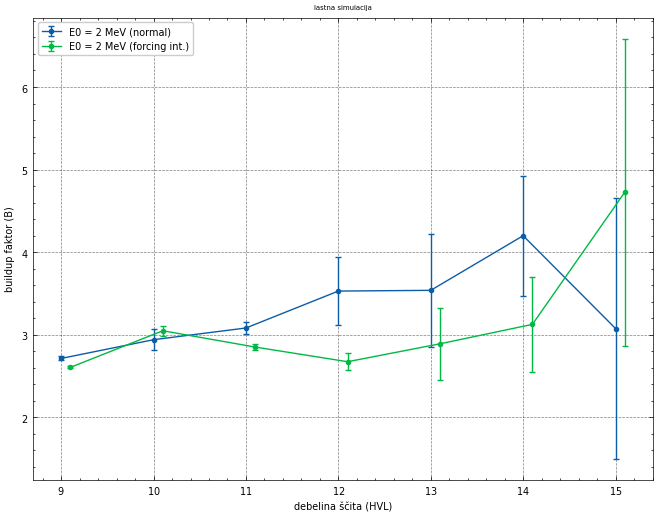

In [123]:
#%% ploting results


# glavni rezultat: simulation_results  -- analiza
#E0 = 1
#simulation_results[E0][:,0]

#%% plotting
plt.figure(figsize=(8,6))
#plt.style.use(['default'])
plt.style.use(['science','no-latex','nature','grid'])

energies1 = energies[:3]
energies2 = energies[2:4]
energies3 = energies[3:4]


#zamik = [0,0.1,0.2]
#colors1 = ['purple','b','lightgreen']
#colors2 = ['c','k','r']
i = -1

# here: choose, which energies to plot!
for E0 in energies3:
    i+= 1
    hvl = np.array(hvl_range)
    B1 = Results1[E0][:, 0]
    B1_std = Results1[E0][:, 1]
    #Bstd = np.sqrt(Bvar)
    t1 = Results1[E0][:, 2]
    B2,B2_std,t2 = Results2[E0][:, 0], Results2[E0][:,1], Results2[E0][:,2]

    plt.errorbar(hvl, B1, yerr=B1_std, label=f'E0 = {E0} MeV (normal)', fmt='-o',capsize=2)      
    plt.errorbar(hvl + 0.1, B2, yerr=B2_std, label=f'E0 = {E0} MeV (forcing int.)', fmt='-o',capsize=2)
    
    #plt.errorbar(hvl + zamik[i], B, yerr=Bstd, label=f'E0 = {E0} MeV', fmt='-o', \
                 #capsize=2,color=colors2[i])

plt.xlabel('debelina ščita (HVL)')
plt.ylabel('buildup faktor (B)')
plt.legend()
plt.title('lastna simulacija',size=5)
plt.show()


In [61]:
#%% 3a) SIMULACIJA PO PLASTEH IN SPROTNO VZORČEVANJE (prvotna test koda za razvijanje)  --> pomnoževanje fotonov (photon splitting)

def simulate_photon(E,pos,dir,w,current_layer,shield,num_layers):
    
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    
    # shield
    d,a,b = shield

    #### first look if photon escapes or interacts inside layer
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)
    s_free = InteractionLength(E,E_gamma,AC_wo_coh)
    
    # i.) escape from layer
    if s_free > lam:
    
        # a) moves to next layer
        if escape_side == 1 and current_layer != num_layers:
            print('move to next layer')
            int_type = 'none'
            current_layer += 1
            pos += lam * dir
            pos[0] = 0
            w = w/2
            output = {'E':E, 'pos':pos, 'dir':dir, 'w':w, 'event': 'move to next layer', 'int_type': int_type,'current_layer':current_layer}
       
        # b) escapes - either through right side - contribute to dose/buildup - or side borders of cuboid - don't contribute 
        else:
            print('escape')
            dose_contribution = False
            if escape_side == 1:
                #E_out += E
                dose_contribution = True
            output = {'E_out': E, 'dose_contribution': dose_contribution,'ploskev':escape_side,'event': 'escape','current_layer':current_layer,'w':w}
    
    # ii.) interact inside layer
    else:
        # position change
        print('s_free = {}; (path to exit: {})'.format(s_free,lam))
        pos += s_free * dir
        # interaction type
        ac_com, ac_pe,ac_pp = (
        AC_interpolation(E,E_gamma,AC_compton),
        AC_interpolation(E,E_gamma,AC_fe), 
        AC_interpolation(E,E_gamma,AC_tp) 
        )
        ac_tot = ac_com + ac_pe + ac_pp
        bound1 = ac_com / ac_tot
        bound2 = bound1 + ac_pe/ac_tot
        # draw interaction type
        int_draw = UNFM()

        # possible interactions: cs, pe or pp
        if int_draw < bound1:
            int_type = 'compton'
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            #alpha *= eps
            omega = (th_cs,phi_cs)
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            output = {'E':E,'E_abs':E_abs,'pos':pos,'dir':dir,'w':w,'event':'cs','int_type':int_type,'current_layer':current_layer,'eps':eps}

        elif int_draw > bound2:
            int_type = 'pp'
            # both el. and positron localy transmit energy
            #E_abs += E_current - 1.022
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            print('omega1:{};dir1:{}'.format(omega1,dir1))
            # direction of second photon is opposite of the direction of the 
            # first one, collect directions from all pair prodiction events
            # to simulate all 'second' photons later in code (look below) 
            
            # bad option
            #omega2 = (
            #omega1[0] + np.pi if omega1[0]<np.pi else omega1[0] - np.pi,
            #np.pi - omega1[1]
            #)
            #dir2=Spherical_to_cartesian(omega2)

            # better option
            dir2 = - np.array(dir1)
            print('dirs of annih. photons:{},{}'.format(dir1,dir2))
            omega2 = Cartesian_to_spherical(dir2)

            #return E, pos, dir1, dir2, w, current_layer, int_type 
            output = {'E':E,'E_abs':E_abs,'pos':pos,'dir1':dir1,'dir2':dir2,'w':w,'event':'pp','int_type':int_type,'current_layer':current_layer}
       
        else:
            int_type = 'pe'
            E_abs = E
            E = 0
            output = {'E':E,'pos':pos,'dir':dir,'w':w,'E_abs':E_abs,'event':'pe','int_type':int_type,'current_layer':current_layer}

    return output


def run_simulation(N_simulated,n_layers,E0,w_min=10**(-3)):
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_layers={},w_min={}".format(E0,N_sim,n_layers,w_min))
    photon_queue = []

    E_out, E_abs = 0,0
    E_lost = 0  # energy escaped thorugh side borders of cuboid
    E_backscatter = 0  # enegy escaped backards - towards initial source

    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    hvl = np.log(2) / ac0_tot
    d = n_layers * hvl
    a = b = 3 * d
    shield = (d,a,b)
    print("AC0={} /cm; hvl={} cm ; d={}".format(ac0_tot,hvl,d))


    for i in range(N_simulated):
        print('\n-----------start simulating photon number {}-----------'.format(i))
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        w = 1.0  # start weight
        current_layer = 1

        photon_queue.append((E,pos,dir,w,current_layer))

        # count photons simulated from initial one (i-th)
        i_ind = 0

        while photon_queue:
            num = len(photon_queue)
            print(' ---photons to simulate (#={})--:'.format(num))
            for i in range(num):
                E,pos,dir,w,current_layer = photon_queue[i]
                print('   - photon num. {}: E={},pos={},dir={},w={},layer={}'.format(i,E,pos,dir,w,current_layer))
            
            #print('current photons: {photon_queue}')
            i_ind += 1
            E, pos, dir, w, current_layer = photon_queue.pop(0)  # Process the first photon in the queue
            
            # new move
            new_photon = simulate_photon(E,pos,dir,w,current_layer,shield,n_layers)
            #print(f'new photon:{new_photon}')
            #E_new, pos_new, dir_new, w_new, current_layer_new = simulate_photon(i,E,pos,dir,w,current_layer)

            # Russian roulette for low w
            if w < w_min:
                if UNFM() < w:
                    w *= 1/w_min
                else:
                    continue
            
            if new_photon['event'] == 'escape':
                w = new_photon['w']
                E_escaped = new_photon['E_out'] * w
                if new_photon['ploskev'] == 1:
                    E_out += E_escaped
                    print('Photon [{},{}] with energy {} escapes on right side - > contribute to dose/B '.format(i,i_ind,E_out))
                elif new_photon['ploskev'] == 0:
                    E_backscatter += E_escaped
                    print('Photon [{},{}] escapes - backscatters! -> not contributing to dose/B'.format(i,i_ind))
                else:
                    E_lost += E_escaped
                    print('Photon [{},{}] escapes through side layers! -> not contributing to dose/B'.format(i,i_ind))

            elif new_photon['event'] == 'move to next layer':
                E, pos, dir, w, cl = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['w'], new_photon['current_layer']
                photon_queue.extend([(E,pos,dir,w,cl),(E,pos,dir,w,cl)])
                print(f'Photon [{i},{i_ind}] moves to next layer.')
                #new_photons = split_photon()

            elif new_photon['event'] == 'cs':
                w = new_photon['w']
                E_abs += new_photon['E_abs'] * w
                E, pos, dir, w, cl = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['w'], new_photon['current_layer']
                eps = new_photon['eps'] 
                photon_queue.append((E,pos,dir,w,cl))
                print(f'Photon [{i},{i_ind}] experiences Compoton scattering, preserves {eps*100} % of initial energy!')

            elif new_photon['event'] == 'pe':
                w = new_photon['w']
                E_abs += new_photon['E_abs'] * w
                print(f'Photon [{i},{i_ind}] is absorbed via photoeffect!')

            elif new_photon['event'] == 'pp':
                w = new_photon['w']
                E_abs += new_photon['E_abs'] * w
                pos, dir1, dir2, w, current_layer = new_photon['pos'], new_photon['dir1'], new_photon['dir2'], new_photon['w'], new_photon['current_layer']
                #new_photons = add_annihilation_photons(pos,dir1,dir2,w,current_layer)
                new_photons = [(E,pos,dir1,w,current_layer),(E,pos,dir2,w,current_layer)]
                photon_queue.extend(new_photons)
                #print('WATCH:',photon_queue)
                print(f'Photon [{i},{i_ind}] produces pair e+e-, annihilation to two 511keV gammas follows at pp site!')

            else:
                print('Ops,wrong event type')
                break
        
        print('-->>Finish simulating {}-th photon'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~')
    E_tot = np.round(E_abs+E_out+E_backscatter+E_lost,2)
    out= {
        'E_abs':E_abs,
        'E_out':E_out,
        'E_backscatter': E_backscatter,
        'E_lost': E_lost
    }
    print('simulation report:{}; E_total_init (measured,theory)=({},{})'.format(out,E_tot,N_simulated*E0))
    return out

print('\n\n----------------WELL THIS CODE IS NOT CORRECT!!!------------\n\n')

run_simulation(N_simulated=10,n_layers=2,E0=5)
#[simulate_photon(1,1,(0.01,0.01,0.01),np.array([1,0.01,0.01]),1,1,(1,3,4),3)['event'] for _ in range(100)]


----------------WELL THIS CODE IS NOT CORRECT!!!------------
~~~~~~~STARTING SIMULATION~~~~
Properties:E0=5,N_sim=10000,n_layers=2,w_min=0.001
AC0=0.48351 /cm; hvl=1.4335736190770518 cm ; d=2.8671472381541037

-----------start simulating photon number 0-----------
 ---photons to simulate (#=1)--:
   - photon num. 0: E=5,pos=[0. 0. 0.],dir=[1.e+00 1.e-13 1.e-13],w=1.0,layer=1
s_free = 1.5557454641047803; (path to exit: 2.8671472381541037)
omega1:(1.4482579270212017, 1.4360018684911873);dir1:[0.12112319 0.98349855 0.13438664]
dirs of annih. photons:[0.12112319 0.98349855 0.13438664],[-0.12112319 -0.98349855 -0.13438664]
Photon [0,1] produces pair e+e-, annihilation to two 511keV gammas follows at pp site!
 ---photons to simulate (#=2)--:
   - photon num. 0: E=5,pos=[1.55574546e+00 1.55574546e-13 1.55574546e-13],dir=[0.12112319 0.98349855 0.13438664],w=1.0,layer=1
   - photon num. 1: E=5,pos=[1.55574546e+00 1.55574546e-13 1.55574546e-13],dir=[-0.12112319 -0.98349855 -0.13438664],w=1.0,lay

{'E_abs': 257.5061110102739,
 'E_out': 19.655279261733707,
 'E_backscatter': 69.37762561723818,
 'E_lost': 22.84962153074597}

In [126]:
# 3b) code for splitting method (testing code with printing)

def simulate_photon_in_layer(E,pos,dir,w,current_layer,layer_dims,num_layers):
    # check if everything all right
    if current_layer < 1 or current_layer > num_layers:
        print('wrong current layer')

    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    
    # layer dimensions
    d1,a,b = layer_dims  # d1 is same as hvl0 = hvl @ E0

    #### first look if photon escapes or interacts inside layer
    lam, escape_side = PathToExit(d1,a,b,r0=pos,direction=omega)
    s_free = InteractionLength(E,E_gamma,AC_wo_coh)   ## here different aproach to calculate int type as ~50% (or what %?) chance of photon not interacting,
    # so probably this is most time efficinet - as so much other stuff here in codes this could also be researched/analysed and then find true time optimized
    # varinte of calculating this stuff (but so hard, time and effort consuming...) 

    # i.) escape from layer
    if s_free > lam:
        print(' NO INTERACTION as: s_free > lam ({} vs {})'.format(s_free, lam))
        pos = np.copy(pos)
        pos += lam * dir

        # a) escape side = 1 - on right
        if escape_side == 1:
            # ii) move to next layer on right
            if current_layer < num_layers:
                w = w/2
                pos[0] = 1/10**13
                current_layer += 1
                # is here np.copy(pos) needed? - check it out!!
                return {'E':E, 'pos':np.copy(pos), 'dir':dir, 'w':w, 'event': 'move to next layer','current_layer':current_layer,'side':'right'}
            # ii) escape on right and dose dontribution
            elif current_layer == num_layers:  # just use else - less time consuming! Or also use else: wrong layer under this one (safety check!!!)
                return {'E_out':E, 'w':w, 'event': 'escape on right'}

        # b) escape side = 0 - on left
        elif escape_side == 0:
            # i) backscatter
            if current_layer == 1:
                return {'E_bs':E,'w':w, 'event': 'backscatter'}
            # ii) move to next layer on left
            elif current_layer > 1:
                w = w/2
                pos[0] = d1 - 1/10**13  # here photon is at the right side of the layer ofc!
                current_layer -= 1 # subtract instrad of add up one layer !!
                return {'E':E, 'pos':np.copy(pos), 'dir':dir, 'w':w, 'event': 'move to next layer','current_layer':current_layer,'side':'left'}
        
        # c) escapes throung side layers
        elif escape_side not in [0,1]:
            return {'E_lost':E, 'w':w, 'event': 'escape on side'}

        # else: wrong number!
        else:
            print('Wrong escape side!')
    
    # ii.) interact inside layer
    else:
        print('INTERACTION takes place! as: s_free<lam ({} vs {})'.format(s_free,lam))
        # position change
        pos = np.copy(pos)
        pos += s_free * dir
        # interaction type
        ac_com, ac_pe,ac_pp = [ AC_interpolation(E,E_gamma,AC) for AC in [AC_compton,AC_fe,AC_tp] ]

        ac_tot = ac_com + ac_pe + ac_pp
        bound1 = ac_com / ac_tot # bound between compton and pe
        bound2 = bound1 + ac_pe/ac_tot  # bound between pe and pp
        
        # draw interaction type
        int_draw = UNFM()
        # possible interactions: cs, pe or pp
        if int_draw < bound1:
            event = 'compton'
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            return {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir':dir,'eps':eps,'w':w,'event': event,'current_layer':current_layer}

        elif int_draw > bound2:
            event = 'pp'
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            dir2 = - np.array(dir1)
            return {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir1':dir1,'dir2':dir2,'w':w,'event': event,'current_layer':current_layer}
       
        else:
            event = 'pe'
            return {'E_abs':E,'w':w,'event':event}

def PhotonSimulation_splitting(E0,N_simulated,n_hvl,w_min=0.001):
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* d
    # dimensions of shield and one layer
    shield = [d,a,b]
    layer_dims = [HVL0,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')
     
    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    # additional photon counting
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err = 0
    n_rl,n_succ = 0,0
    #n_split = 0 # number of splittings! -> n_sim = N_simulated + n_split ... but also new photons when pp occurs!!! - so need two split counings
    n_split_pp, n_split_layer = 0,0
    #n_sim, n_steps = N_simulated,0 # simulated photons and total num. of steps - photon that is absorbed in 3rd layer has 3 steps (layer change 2x and then
      # absorption in last step) ect (each event =one step) - n_steps not used yet!!!

    photon_queue = []

    for i in range(N_simulated):
        print('\n---------simulating photon number {}'.format(i))
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        w = 1.0  # start weight
        cl = 1 # curren layer !!

        photon_queue.append((E,np.copy(pos),np.copy(dir),w,cl))

        while photon_queue:
            num = len(photon_queue)
            print(' ---photons to simulate (how many in queue: {})--:'.format(num))
            for j in range(num):
                E_pr,pos_pr,dir_pr,w_pr,cl_pr = photon_queue[j] # extracting data for printing
                print('   - photon num. {}: E={},pos={},dir={},w={},layer={}'.format(j,E_pr,pos_pr,dir_pr,w_pr,cl_pr))

            # first photon in line - extract data
            E_ph, pos_ph, dir_ph, w_ph, cl_ph = photon_queue.pop(0)  # Process the first photon in the queue
            print('next photon to simulate: E={},pos={},dir={},w={},cl={}\n'.format(E_ph,pos_ph,dir_ph,w_ph,cl_ph))

            # new move
            new_photon = simulate_photon_in_layer(E_ph,pos_ph,dir_ph,w_ph,cl_ph,layer_dims,n_hvl)

            # new weight (need of new label w_new or not??)
            w_new = new_photon['w']
            # Russian roulette for low w
            ##### IMPORTANT TO CONSIDER: what is reasonable value for w_min??? - dont want the result to depend on randomness!!! (proly 1/w_min << N_sim )
            if w_new < w_min:
                n_rl += 1
                if UNFM() < w_min:
                    print('russian roulette - succesfull (w={})'.format(w_new))
                    n_succ += 1
                    w_new *= 1/w_min
                else:
                    print('russian roulette - failed (w={})'.format(w_new))
                    continue

            #### WHAT HAPPENED??
            event = new_photon['event']

            # i) move to next layer
            if event == 'move to next layer':
                n_split_layer += 1
                E_new, pos_new, dir_new, cl_new = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['current_layer']
                photon_queue.extend([(E_new,np.copy(pos_new),np.copy(dir_new),w_new,cl_new),(E_new,np.copy(pos_new),np.copy(dir_new),w_new,cl_new)])
                print('Photon MOVES TO NEXT LAYER on {}'.format(new_photon['side']))
                continue

            ## ii) interaction
            elif event == 'compton':
                n_cs += 1
                E_abs_ph = new_photon['E_abs']*w_new  # side note: here dont need to count energis also w/o weights to get same E_tot_det as E_tot_th!! 
                # (as we are splitting photons) - different case with other two var. reduction methods as total erergy dropped as no new photons are created
                E_abs += E_abs_ph
                E_new, pos_new, dir_new, cl_new = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['current_layer']
                photon_queue.append((E_new,np.copy(pos_new),np.copy(dir_new),w_new,cl_new))
                eps_new = new_photon['eps'] 
                print('Photon experiences COMPTON SCATTERING, preserves {} % of initial energy!; E_abs = {}'.format(eps_new*100,E_abs_ph))
                continue

            elif event == 'pe':
                n_abs += 1
                E_abs += new_photon['E_abs'] * w_new
                print('Photon is absorbed via PHOTOEFFECT! (E_abs ={})'.format(new_photon['E_abs']*w_new))
                continue

            elif event == 'pp':
                n_pp += 1
                n_split_pp += 1
                E_abs += new_photon['E_abs'] * w_new
                pos_pp, dir1_pp, dir2_pp, cl_pp = new_photon['pos'], new_photon['dir1'], new_photon['dir2'], new_photon['current_layer']
                m_el = 0.511
                photon_queue.append((m_el,np.copy(pos_pp),np.copy(dir1_pp),w_new,cl_pp))
                photon_queue.append((m_el,np.copy(pos_pp),np.copy(dir2_pp),w_new,cl_pp))
                print('Photon PRODUCES PAIR E+E-, annihilation to two 511keV gammas follows at pp site! (E_abs={})'.format(new_photon['E_abs']*w_new))
                continue

            ## iii) escape 
            elif new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out'] # carefull with names, almost named this one E_out
                print('  escape on right; E_out={}'.format(E_photon))
                if E_photon == E0:
                    print(' -------(WAS PRIMARY PHOTON!!!!!!!!)---')
                    n_esc_prim += 1
                E_out += E_photon * w_new
                continue 
            elif new_photon['event'] == 'backscatter':
                n_bs += 1
                E_bs += new_photon['E_bs'] * w_new
                print('  photon bacscatters with E_bs={}'.format(new_photon['E_bs']*w_new))
                continue
            elif new_photon['event'] == 'escape on side':
                n_lost += 1
                E_lost += new_photon['E_lost'] * w_new
                print('escape on side!')
                continue

            else:
                n_err += 1
                print('Ops,wrong event type ({})'.format(new_photon['event']))
                #print(new_photon)

        
        print('-->>Finish simulating {}-th photon\n\n\n'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
        # check clock
    t_simulation = time.time() - T_start
    # calculate biuldup factor
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)
    E_tot_th = N_simulated * E0
    E_out_theory = E_tot_th * 2**(-n_hvl)
    buildup = E_out / E_out_theory
    # other stuff...
    n_sim = N_simulated + n_split_layer + n_split_pp # total number of simulated photons 
    n_tot_terminated = n_lost + n_abs + n_bs + n_cs + n_err + n_pp
    succ_procent = np.round(n_succ*100/n_rl,2) if n_rl>0 else 0
    events_report = {
        'n_esc_prim':n_esc_prim,
        'n_esc_right':n_esc_right,
        'n_bs':n_bs,
        'n_lost':n_lost,
        'n_abs':n_abs,
        'n_cs':n_cs,
        'n_pp':n_pp,
        'n_err':n_err,
        'n_split (pp,layer)': [n_split_pp,n_split_layer],
        'n_sim': n_sim,
        'n_tot_terminated': n_tot_terminated,
        'n_rl': n_rl,
        'n_succ': '{} ({}%)'.format(n_succ,succ_procent)
        }
    out= {
        'buildup':buildup,
        't_sim': t_simulation,
        'E_abs':E_abs,
        'E_out':E_out,
        'E_out_th':E_out_theory,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        'events report': events_report
    }
    
    return out

E0 = 3
N_sim = 10**1
n_hvl = 5
w_min = 1 / 10**2
PhotonSimulation_splitting(E0,N_sim,n_hvl,w_min)



~~~~~~~STARTING SIMULATION~~~~
Properties:E0=3,N_sim=10,n_hvl=5,w_min=0.01
   ----dimensions: ac0=0.4767;hvl0=1.4541;d=7.2703 (n_hvl*1.4541)

---------simulating photon number 0
 ---photons to simulate (how many in queue: 1)--:
   - photon num. 0: E=3,pos=[0. 0. 0.],dir=[1.e+00 1.e-13 1.e-13],w=1.0,layer=1
next photon to simulate: E=3,pos=[0. 0. 0.],dir=[1.e+00 1.e-13 1.e-13],w=1.0,cl=1

 NO INTERACTION as: s_free > lam (7.667934365711625 vs 1.4540532422067238)
Photon MOVES TO NEXT LAYER on right
 ---photons to simulate (how many in queue: 2)--:
   - photon num. 0: E=3,pos=[1.00000000e-13 1.45405324e-13 1.45405324e-13],dir=[1.e+00 1.e-13 1.e-13],w=0.5,layer=2
   - photon num. 1: E=3,pos=[1.00000000e-13 1.45405324e-13 1.45405324e-13],dir=[1.e+00 1.e-13 1.e-13],w=0.5,layer=2
next photon to simulate: E=3,pos=[1.00000000e-13 1.45405324e-13 1.45405324e-13],dir=[1.e+00 1.e-13 1.e-13],w=0.5,cl=2

INTERACTION takes place! as: s_free<lam (1.172003813178084 vs 1.454053242206624)
Photon experienc

{'buildup': 1.9620066716406248,
 't_sim': 0.4690737724304199,
 'E_abs': 28.160618745336933,
 'E_out': 1.8393812546630857,
 'E_out_th': 0.9375,
 'E_lost': 0,
 'E_backscatter': 0,
 'E_tot_detected': 30.0,
 'E_tot_th': 30,
 'events report': {'n_esc_prim': 3,
  'n_esc_right': 15,
  'n_bs': 0,
  'n_lost': 0,
  'n_abs': 45,
  'n_cs': 62,
  'n_pp': 9,
  'n_err': 0,
  'n_split (pp,layer)': [9, 41],
  'n_sim': 60,
  'n_tot_terminated': 116,
  'n_rl': 0,
  'n_succ': '0 (0%)'}}

In [32]:
# 3c) code for splitting method (final code - w/o printing)

def simulate_photon_in_layer(E,pos,dir,w,current_layer,layer_dims,num_layers):
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # layer dimensions
    d1,a,b = layer_dims  # d1 is same as hvl0 = hvl @ E0

    #### first look if photon escapes or interacts inside layer
    lam, escape_side = PathToExit(d1,a,b,r0=pos,direction=omega)
    s_free = InteractionLength(E,E_gamma,AC_wo_coh)

    # i.) escape from layer
    if s_free > lam:
        pos = np.copy(pos)
        pos += lam * dir
        # a) escape side = 1
        if escape_side == 1:
            # i) move to next layer on right
            if current_layer < num_layers:
                w = w/2
                pos[0] = 1/10**13
                current_layer += 1
                output = {'E':E, 'pos':np.copy(pos), 'dir':dir, 'w':w, 'event': 'move to next layer','current_layer':current_layer,'side':'right'}
            # ii) escape on right and dose dontribution
            elif current_layer == num_layers:
                output = {'E_out':E, 'w':w, 'event': 'escape on right'}
        # b) escape side = 0
        elif escape_side == 0:
            # i) backscatter
            if current_layer == 1:
                output = {'E_bs':E,'w':w, 'event': 'backscatter'}
            # ii) move to next layer on left
            elif current_layer > 1:
                event = 'move to next layer'
                w = w/2
                pos[0] = d1 - 1/10**13
                current_layer -= 1 # subtract instrad of add up one layer !!
                output = {'E':E, 'pos':np.copy(pos), 'dir':dir, 'w':w, 'event': event,'current_layer':current_layer,'side':'left'}
        # c) escapes throung side layers
        elif escape_side not in [0,1]:
            event = 'escape on side'
            output = {'E_lost':E, 'w':w, 'event': event}
        else:
            print('wrong escape side')
    
    # ii.) interact inside layer
    else:
        # position change
        pos = np.copy(pos)
        pos += s_free * dir
        # interaction type
        ac_com, ac_pe,ac_pp = (
        AC_interpolation(E,E_gamma,AC_compton),
        AC_interpolation(E,E_gamma,AC_fe), 
        AC_interpolation(E,E_gamma,AC_tp) 
        )
        ac_tot = ac_com + ac_pe + ac_pp
        bound1 = ac_com / ac_tot
        bound2 = bound1 + ac_pe/ac_tot
        # draw interaction type
        int_draw = UNFM()

        # possible interactions: cs, pe or pp
        if int_draw < bound1:
            event = 'compton'
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir':dir,'eps':eps,'w':w,'event': event,'current_layer':current_layer}

        elif int_draw < bound2:
            event = 'pe'
            output = {'E_abs':E,'w':w,'event':event}

        else:  #int_draw > bound2:
            event = 'pp'
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            dir2 = - np.array(dir1)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir1':dir1,'dir2':dir2,'w':w,'event': event,'current_layer':current_layer}
       


    return output

def PhotonSimulation_splitting(E0,N_simulated,n_hvl,w_min=0.001):
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* d
    # dimensions of shield and one layer
    shield = [d,a,b]
    layer_dims = [HVL0,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')
    
    
    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    # additional photon counting
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err = 0
    n_rl,n_succ = 0,0
    n_sim, n_steps = N_simulated,0 # simulated photons and total num. fo steps - photon that is absorbed in 3rd layer has 3 steps (layer change 2x and then
    # absorption in last step) ect (each event =one step)

    photon_queue = []

    for i in range(N_simulated):
        # print every 5% of simulation done
        value = int(np.floor(N_simulated/20))
        N_print = value if value != 0 else 100
        if (i+1)%N_print == 0:
            print('-----------start simulating photon number {} ({}% done); time={}-----------'.format(i+1,np.round(100*(i+1)/N_sim,0),time.time()-T_start))
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        w = 1.0  # start weight
        cl = 1 # curren layer !!

        photon_queue.append((E,np.copy(pos),np.copy(dir),w,cl))

        # count photons simulated from initial one (i-th)
        #i_ind = 0

        while photon_queue:
            # first photon in line - extract data
            E_ph, pos_ph, dir_ph, w_ph, cl_ph = photon_queue.pop(0)  # Process the first photon in the queue

            # new move
            new_photon = simulate_photon_in_layer(E_ph,pos_ph,dir_ph,w_ph,cl_ph,layer_dims,n_hvl)
            w_new = new_photon['w']
            # Russian roulette for low w
            ##### IMPORTANT TO CONSIDER: what is reasonable value for w_min??? - dont want the result to depend on randomness!!! (proly 1/w_min << N_sim )
            if w_new < w_min:
                n_rl += 1
                if UNFM() < w_min:
                    n_succ += 1
                    w_new *= 1/w_min
                else:
                    continue

            #### WHAT HAPPENED??
            event = new_photon['event']
            # i) move to next layer
            if event == 'move to next layer':
                n_sim += 1
                E_new, pos_new, dir_new, cl_new = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['current_layer']
                photon_queue.extend([(E_new,np.copy(pos_new),np.copy(dir_new),w_new,cl_new),(E_new,np.copy(pos_new),np.copy(dir_new),w_new,cl_new)])

            ## ii) interaction
            elif event == 'compton':
                n_cs += 1
                E_abs_ph = new_photon['E_abs']*w_new
                E_abs += E_abs_ph
                E_new, pos_new, dir_new, cl_new = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['current_layer']
                photon_queue.append((E_new,np.copy(pos_new),np.copy(dir_new),w_new,cl_new))
                eps_new = new_photon['eps'] 

            elif event == 'pe':
                n_abs += 1
                E_abs += new_photon['E_abs'] * w_new

            elif event == 'pp':
                n_pp += 1
                n_sim += 1
                E_abs += new_photon['E_abs'] * w_new
                pos_pp, dir1_pp, dir2_pp, cl_pp = new_photon['pos'], new_photon['dir1'], new_photon['dir2'], new_photon['current_layer']
                m_el = 0.511
                photon_queue.append((m_el,np.copy(pos_pp),np.copy(dir1_pp),w_new,cl_pp))
                photon_queue.append((m_el,np.copy(pos_pp),np.copy(dir2_pp),w_new,cl_pp))

            ## iii) escape 
            elif new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out'] # carefull with names, almost named this one E_out
                if E_photon == E0:
                    n_esc_prim += 1
                E_out += E_photon * w_new
            elif new_photon['event'] == 'backscatter':
                n_bs += 1
                E_bs += new_photon['E_bs'] * w_new
            elif new_photon['event'] == 'escape on side':
                n_lost += 1
                E_lost += new_photon['E_lost'] * w_new

            else:
                n_err += 1
                print('Ops,wrong event type ({})'.format(new_photon['event']))
        

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
        # check clock
    t_simulation = time.time() - T_start
    # calculate biuldup factor
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)
    E_tot_th = N_simulated * E0
    E_out_theory = E_tot_th * 2**(-n_hvl)
    #print(E_out_theory)
    buildup = E_out / E_out_theory
    #
    n_tot_terminated = n_lost + n_abs + n_bs + n_cs + n_err + n_pp
    n_esc_prim_th = np.round(N_simulated / 2**n_hvl)
    succ_procent = np.round(n_succ*100/n_rl,2) if n_rl>0 else 0
    events_report = {
        'n_esc_prim':n_esc_prim,
        'n_esc_prim_th':n_esc_prim_th,
        'n_esc_right':n_esc_right,
        'n_bs':n_bs,
        'n_lost':n_lost,
        'n_abs':n_abs,
        'n_cs':n_cs,
        'n_pp':n_pp,
        'n_err':n_err,
        'n_sim': n_sim,
        'n_tot_terminated': n_tot_terminated,
        'n_rl': n_rl,
        'n_succ': '{} ({}%)'.format(n_succ,succ_procent)
        }
    out= {
        'buildup':buildup,
        't_sim': t_simulation,
        'E_abs':E_abs,
        'E_out':E_out,
        'E_out_th':E_out_theory,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        'events report': events_report
    }
    
    return out

E0 = 1
N_sim = 10**5
n_hvl = 5
w_min = 1 / 10**2
PhotonSimulation_splitting(E0,N_sim,n_hvl,w_min)


~~~~~~~STARTING SIMULATION~~~~
Properties:E0=1,N_sim=100000,n_hvl=5,w_min=0.01
   ----dimensions: ac0=0.7721;hvl0=0.8977;d=4.4885 (n_hvl*0.8977)
-----------start simulating photon number 5000 (5.0% done); time=13.872713327407837-----------
-----------start simulating photon number 10000 (10.0% done); time=29.126978397369385-----------
-----------start simulating photon number 15000 (15.0% done); time=44.198065996170044-----------
-----------start simulating photon number 20000 (20.0% done); time=58.2250759601593-----------
-----------start simulating photon number 25000 (25.0% done); time=69.68933200836182-----------
-----------start simulating photon number 30000 (30.0% done); time=80.54739046096802-----------
-----------start simulating photon number 35000 (35.0% done); time=92.05278062820435-----------
-----------start simulating photon number 40000 (40.0% done); time=102.93969130516052-----------
-----------start simulating photon number 45000 (45.0% done); time=114.06637811660767-

{'buildup': 1.7556642884359672,
 't_sim': 260.78320264816284,
 'E_abs': 94255.9129137568,
 'E_out': 5486.450901362397,
 'E_out_th': 3125.0,
 'E_lost': 0.06474676939932428,
 'E_backscatter': 257.56520602916953,
 'E_tot_detected': 99999.99,
 'E_tot_th': 100000,
 'events report': {'n_esc_prim': 49503,
  'n_esc_prim_th': 3125.0,
  'n_esc_right': 98662,
  'n_bs': 1040,
  'n_lost': 2,
  'n_abs': 319260,
  'n_cs': 353962,
  'n_pp': 0,
  'n_err': 0,
  'n_sim': 418966,
  'n_tot_terminated': 674264,
  'n_rl': 2,
  'n_succ': '0 (0.0%)'}}

In [56]:
# 4. different pdf than exponential for interaction length (testing code)

def simulate_photon_pdf_manipulation(E,pos,dir,shield,w=1,ac_reduction=1):
    # E = energy; pos=position; dir=drection; shield=cuboid=d,a,b; w=weight; ac_reduction: ac -> ac/ac_reduction
    
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)
    #s_free = InteractionLength(E,E_gamma,AC_wo_coh)
    interactions = ['cs','pe','pp']
    s_com, s_fe, s_tp = (
        InteractionLength(E,E_gamma,AC_compton),  
        InteractionLength(E,E_gamma,AC_fe), 
        InteractionLength(E,E_gamma,AC_tp)
        )
    s_free, int_type = (
        ac_reduction * min(s_com,s_fe, s_tp),  # extend s_free 
        interactions[np.argmin([s_com,s_fe,s_tp])]
        )
    
    # calculate weight as s_free was extended
    print('weight change:\n  w_old ={}'.format(w))
    if ac_reduction != 1:
        ac_tot = AC_interpolation(E,E_gamma,AC_wo_coh)
        w *= ac_reduction * np.e**(-ac_tot * s_free*(1-1/ac_reduction))
        print('  w_new={}'.format(w))

    # Russian roulette if needed -> actually this step in simulation code! (maybe more effective if here?)
    if w < w_min:
        print('Russian roulette needed')
        if UNFM() < w_min:
            w *= 1/w_min
            print('  -> succesfull Russian roulette; new w= {}'.format(w))
        else:
            print('  -> failed Russian roulette: photon terminated')
            output_weight = {'E_weight':E,'w':w,'event':'weight to small'}
            return output_weight

    #### what happens?
    # i.) escape from shield
    if s_free > lam:
        print('NO INTERACTION as s_free > lam (s_free={}; lam = {})'.format(s_free,lam))
        # a) right side
        if escape_side == 1:
            output = {'E_out':E, 'event': 'escape on right','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            output = {'E_bs':E, 'event': 'backscatter','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes - either through right side - contribute to dose/buildup - or side borders of cuboid - don't contribute 
        else:
            output = {'E_lost': E, 'event': 'escape on side','w':w}
    
    # ii.) interact inside layer
    else:
        print('INTERACTION HAPPENS as s_free < lam (s_free={}; lam = {})'.format(s_free,lam))
        # position change
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            #int_type = 'compton'
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            #omega_cs = (th_cs,phi_cs)
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir':dir,'w':w,'event':int_type,'eps':eps}

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            #dir1 = (UNFM(-1,1),UNFM(-1,1),UNFM(-1,1)) .. this is wrong, non isotropic!! - funny actually, suprisingly also, but is like that
            dir2 = - np.array(dir1)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir1':dir1,'dir2':dir2,'w':w,'event':int_type}
       
        elif int_type=='pe':
            E_abs = E
            E = 0
            output = {'E_abs':E,'pos':np.copy(pos),'dir':dir,'w':w,'E_abs':E_abs,'event':int_type}
        
        else:
            print('Ops, wrong interaction type:{}'.formatint_type)

    return output

def PhotonSimulation_pdf_manipulation(E0,N_simulated,n_hvl,w_min=0.001,beam_type='point',ac_reduction=1):
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    shield = [d,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')

    
    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    E_weight = 0
    # additional photon counting
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err,n_weight = 0, 0

    photon_queue = []

    for i in range(N_simulated):
        print('\n\n---Start simulating photon num {}'.format(i))
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        w = 1.0  # start weight

        photon_queue.append((E,pos,dir,w))

        # count photons simulated from initial one (i-th)
        #i_ind = 0

        while photon_queue:
            num = len(photon_queue)
            print(' ---photons to simulate (how many in queue: {})--:'.format(num))
            for j in range(num):
                E_pr,pos_pr,dir_pr,w_pr = photon_queue[j] # extracting data for printing
                print('   - photon num. {}: E={},pos={},dir={},w={}'.format(j,E_pr,pos_pr,dir_pr,w_pr))    

            # first photon in line - extract data
            E, pos, dir, w = photon_queue.pop(0)  # Process the first photon in the queue

            # new move
            new_photon = simulate_photon_pdf_manipulation(E,pos,dir,shield,w,ac_reduction)

            # new weight (need of new label w_new??)
            w_new = new_photon['w']
            if new_photon['event'] == 'weight to small':
                n_weight += 1
                print('weight to small -> photon terminated')
                ### TO CONSIDER: if chances of w<w_min are negilible, this loop is more of an obstacle and time consuming rather than something benefitial!!
                E_weight += new_photon['E_weight'] * w_new
                continue 
            ### new -> w_min implemented in simulate photon!!!
            # # Russian roulette for low w
            # ##### IMPORTANT TO CONSIDER: what is reasonable value for w_min??? - dont want the result to depend on randomness!!! (proly 1/w_min << N_sim )
            # if w_new < w_min:
            #     #print('Russian roulette needed as w={}'.format(w_new))
            #     if UNFM() < w_min:
            #         w_new *= 1/w_min
            #         print('  -> succesfull Russian roulette; new w= {}'.format(w_new))
            #     else:
            #         print('  -> failed Russian roulette: photon terminated')
            #         continue

            ## i) interaction
            if new_photon['event'] == 'cs':
                n_cs += 1
                E_abs += new_photon['E_abs'] * w_new
                E, pos, dir, w = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['w']
                eps = new_photon['eps'] 
                photon_queue.append((E,np.copy(pos),dir,w))
                print(f'Photon experiences Compoton scattering, preserves {eps*100} % of initial energy!')

            elif new_photon['event'] == 'pe':
                n_abs += 1
                E_abs += new_photon['E_abs'] * w_new
                print(f'Photon is absorbed via photoeffect!')

            elif new_photon['event'] == 'pp':
                n_pp += 1
                E_abs += new_photon['E_abs'] * w_new
                pos, dir1, dir2, w = new_photon['pos'], new_photon['dir1'], new_photon['dir2'], new_photon['w']
                m_el = 0.511
                photon_queue.extend([[m_el,np.copy(pos),dir1,w],[m_el,np.copy(pos),dir2,w]])
                print(f'Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!')

            ## ii) escape
            elif new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out']
                print('escape on right')
                if E_photon == E0:
                    n_esc_prim += 1
                E_out += E_photon * w_new
            elif new_photon['event'] == 'backscatter':
                n_bs += 1
                E_bs += new_photon['E_bs'] * w_new
                print('backscatter')
            elif new_photon['event'] == 'escape on side':
                n_lost += 1
                E_lost += new_photon['E_lost'] * w_new
                print('escape on side')

            else:
                n_err += 1
                print('Ops,wrong event type')
                print(new_photon)

        
        print('-->>Finish simulating {}-th photon'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
        # check clock
    t_simulation = time.time() - T_start
    # calculate biuldup factor
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)
    E_tot_th = N_simulated * E0
    E_out_theory = E_tot_th * 2**(-n_hvl)
    #print(E_out_theory)
    buildup = E_out / E_out_theory
    events_report = {
        'n_esc_prim':n_esc_prim,
        'n_esc_right':n_esc_right,
        'n_bs':n_bs,
        'n_lost':n_lost,
        'n_abs':n_abs,
        'n_cs':n_cs,
        'n_pp':n_pp,
        'n_weight': n_weight,
        'n_err':n_err
        }
    out= {
        'buildup':buildup,
        't_sim': t_simulation,
        'E_abs':E_abs,
        'E_out':E_out,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_weight': E_weight,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        'events report': events_report
    }
    
    return out


E0 = 2
N_sim = 10**2
n_hvl = 4
w_min = 1 / 10**2
ac_red = 2
PhotonSimulation_pdf_manipulation(E0,N_sim,n_hvl,w_min=w_min,ac_reduction=ac_red)

# res = PhotonSimulation_pdf_manipulation(E0,N_sim,n_hvl,w_min=w_min,ac_reduction=ac_red)
# print('\n  res_events:  {}\n'.format(res['events report']))
# print('\n  res:  {}\n'.format(res))



~~~~~~~STARTING SIMULATION~~~~
Properties:E0=2,N_sim=100,n_hvl=4,w_min=0.01
   ----dimensions: ac0=0.5142;hvl0=1.3481;d=5.3925 (n_hvl*1.3481)


---Start simulating photon num 0
 ---photons to simulate (how many in queue: 1)--:
   - photon num. 0: E=2,pos=[0. 0. 0.],dir=[1.e+00 1.e-13 1.e-13],w=1.0
weight change:
  w_old =1.0
  w_new=0.4380206430078938
NO INTERACTION as s_free > lam (s_free=5.90730974169742; lam = 5.392515335336195)
escape on right
-->>Finish simulating 0-th photon


---Start simulating photon num 1
 ---photons to simulate (how many in queue: 1)--:
   - photon num. 0: E=2,pos=[0. 0. 0.],dir=[1.e+00 1.e-13 1.e-13],w=1.0
weight change:
  w_old =1.0
  w_new=0.4219672375116598
NO INTERACTION as s_free > lam (s_free=6.052551408614962; lam = 5.392515335336195)
escape on right
-->>Finish simulating 1-th photon


---Start simulating photon num 2
 ---photons to simulate (how many in queue: 1)--:
   - photon num. 0: E=2,pos=[0. 0. 0.],dir=[1.e+00 1.e-13 1.e-13],w=1.0
weight chang

{'buildup': 1.682772100210033,
 't_sim': 0.23226642608642578,
 'E_abs': 175.93346894732244,
 'E_out': 21.034651252625412,
 'E_lost': 0,
 'E_backscatter': 2.63369102503158,
 'E_weight': 0.011220261118290177,
 'E_tot_detected': 199.6,
 'E_tot_th': 200,
 'events report': {'n_esc_prim': 27,
  'n_esc_right': 38,
  'n_bs': 2,
  'n_lost': 0,
  'n_abs': 67,
  'n_cs': 107,
  'n_pp': 8,
  'n_weight': 1,
  'n_err': 0}}

In [81]:
E = .564
acs = [AC_interpolation(E,E_gamma,AC) for AC in (AC_compton,AC_fe,AC_tp)]
acs



[0.73009556, 0.7300728600000002, 0]

In [97]:
## simulate_photon miox func for altered pdf - prolongd s_free - and forcing interactions  - FOR NOW NOT APPROPRIATE
  # maybe to consider more if altered pdf and normal simulation are to be put together as they are almost identical!!!

def simulate_photon_pdf(E,pos,dir,shield,w,ac_rf):
    # ac_rf =  ac reduction factor: ac -> ac / ac_rf (ac_rf -times less likely interaction - and apply weight to that)

    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)

    ## TO CONSIDER - some things could be their own functions, like s_free and int_type or weight for forcing int...!!!

    # drawing free paths for every interaction
    interactions = ['cs','pp','pe']
    s_com, s_pp, s_pe = [ InteractionLength(E,E_gamma,AC) for AC in [AC_compton,AC_tp,AC_fe] ]

    # variance reduction method
    s_free, int_type = (min(s_com,s_pp, s_pe),interactions[np.argmin([s_com,s_pp,s_pe])])
    s_free *= ac_rf  # MUST BE AFTER w CHANGE!!!!!!  --->> NOPEEEEEEE, SHOULD BE BEFORE!!!! THINK ABOUT IT!!!!!!!!!
    ac_tot = AC_interpolation(E,E_gamma,AC_wo_coh)
    w *= ac_rf * np.exp(-ac_tot * s_free*(1 - 1/ac_rf))

    #### what happens?    
    # i.) interact inside layer
    if s_free < lam:
        print('INTERACTION HAPPENS as s_free < lam (s_free={}; lam = {})'.format(s_free,lam))
        # position change - careful, need of copy of position
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            return {'E':E,'E_abs':E_abs,'pos':pos,'dir':dir,'event':int_type,'eps':eps}

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            dir2 = - np.array(dir1)
            return {'E':E,'E_abs':E_abs,'pos':pos,'dir1':dir1,'dir2':dir2,'event':int_type}
       
        elif int_type=='pe':
            return {'E_abs':E,'pos':pos,'dir':dir,'event':int_type}
        
    # ii.) escape from shield
    elif s_free > lam:
        print('NO INTERACTION as s_free > lam (s_free={}; lam = {})'.format(s_free,lam))
        # a) right side - contribute to dose
        if escape_side == 1:
            return {'E_out':E, 'event': 'escape on right'} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            return {'E_bs':E, 'event': 'backscatter'} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes through side borders of cuboid - don't contribute to dose/buildup
        else:
            return {'E_lost': E, 'event': 'escape on side'}
    
    # wrong int type (??) 
    else:
        print('Ops, wrong interaction type:{}'.format(int_type))





In [135]:
# NEW:  new forcing code

def simulate_photon_forcing(E,pos,dir,shield,w):
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)

    ## TO CONSIDER - some things could be their own functions, like s_free and int_type or weight for forcing int...!!!

    # drawing free paths for every interaction - without pe!
    interactions = ['cs','pp']
    s_com, s_pp = [ InteractionLength(E,E_gamma,AC) for AC in [AC_compton,AC_tp] ]

    # variance reduction method: forcing interactions
    s_free, int_type = (min(s_com,s_pp),interactions[np.argmin([s_com,s_pp])])
    # # new weight -- NOPE, HERE ĐABE TO CALCULATE THIS, MAYBE PHOTON WONT EVEN INTERACT!!
    # ac_cs, ac_pe, ac_pp = [AC_interpolation(E,E_gamma,AC) for AC in (AC_compton,AC_fe,AC_tp)]
    # ac_tot = ac_cs + ac_pe + ac_pp
    # w *= (ac_cs + ac_pp) / ac_tot  # only changed if next interaction does occur!!!

    #### what happens?    
    # i.) interact inside layer
    if s_free < lam:
        print('INTERACTION HAPPENS as s_free < lam (s_free={}; lam = {})'.format(s_free,lam))
        # position change - careful, need to copy position
        pos = np.copy(pos)
        pos += s_free * dir
        # new weight - here is the place to claculate it!!
        ac_cs, ac_pe, ac_pp = [AC_interpolation(E,E_gamma,AC) for AC in (AC_compton,AC_fe,AC_tp)]
        ac_tot1 = AC_interpolation(E,E_gamma,AC_wo_coh)
        ac_tot2 = ac_cs + ac_pe + ac_pp
        print('ac_tot1,ac_tot2 = ({},{})  (should be same)'.format(ac_tot1,ac_tot2))
        ac_tot = ac_tot2
        w *= (ac_cs + ac_pp) / ac_tot
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            dir = DirectionAfterCompton(omega,th_cs,phi_cs) 
            return {'E':E,'E_abs':E_abs,'pos':pos,'dir':dir,'event':int_type,'eps':eps,'w':w}

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            dir2 = - np.array(dir1)
            return {'E':E,'E_abs':E_abs,'pos':pos,'dir1':dir1,'dir2':dir2,'event':int_type,'w':w}
        
    # ii.) escape from shield
    elif s_free > lam:
        print('NO INTERACTION as s_free > lam (s_free={}; lam = {})'.format(s_free,lam))
        # a) right side - contribute to dose
        if escape_side == 1:
            return {'E_out':E, 'event': 'escape on right','w':w} 

        # b) left side - backscatter
        elif escape_side == 0:
            return {'E_bs':E, 'event': 'backscatter','w':w} 

        # c) escapes through side borders of cuboid - don't contribute to dose/buildup
        else:
            return {'E_lost': E, 'event': 'escape on side','w':w}
    
    # wrong int type (??) 
    else:
        print('Ops, wrong interaction type:{}'.format(int_type))

def simulate_first_photon_forcing(E,d,dir):
    print(' --start simulating first interaction--')
    omega = Cartesian_to_spherical(dir)
    interactions = ['cs','pp']
    ac_tot, ac_cs, ac_pp = [AC_interpolation(E,E_gamma,AC) for AC in [AC_wo_coh,AC_compton,AC_tp]]
    ind = 0
    # forcing interaction
    while True:
        ind += 1
        s_com, s_pp = [ InteractionLength(E,E_gamma,AC) for AC in [AC_compton,AC_tp] ]
        s_free, int_type = min(s_com,s_pp),  interactions[np.argmin([s_com,s_pp])]
        print('    - try num. {} : s_free,int_type = ({},{})'.format(ind,s_free,int_type))
        if s_free < d:
            print('    -> this try was succesful')
            print('   s_com,s_pp = ({},{})'.format(s_com,s_pp))
            w1 = 1 - np.exp(-ac_tot * d)
            w2 = (ac_cs + ac_pp) / ac_tot
            break
    # starting weight  --> IS THIS WEIGHT EVEN RIGHT???
    w = w1 * w2
    print(' - starting weight (always the same) w={} (w_int_forcing,w_int_type_forcing) = ({},{})'.format(w,w1,w2)) 
    # new position
    pos = np.array([s_free,0,0])
    print(' - new position: {}'.format(pos))
    # new energy and direction
    if int_type == 'cs':
        print(' First int. is Compton!')
        alpha = E/0.511
        eps = ComptonEnergyGenerator(E)
        th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
        phi_cs = UNFM(0,2*np.pi)                
        E_abs = E * (1-eps)
        E *= eps
        dir = DirectionAfterCompton(omega,th_cs,phi_cs) 
        return {'E':E,'E_abs':E_abs,'pos':pos,'dir':dir,'event':int_type,'eps':eps,'w':w}        

    elif int_type=='pp':
        print(' First int. is PP!')
        # both el. and positron localy transmit energy
        # positron creates 2 anihilation photons at 511 keV 
        E_abs = E - 1.022
        E = 0.511
        omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
        # about direction - here for now i decided to use just dir (same as dir1) and then in simulate code i add -dir (same as dir2)
        dir = Spherical_to_cartesian(omega1)
        #dir1 = Spherical_to_cartesian(omega1)
        #dir2 = - np.array(dir1)
        return {'E':E,'E_abs':E_abs,'pos':pos,'dir':dir,'event':int_type,'w':w}


def PhotonSimulation_forcing(E0,N_simulated,n_hvl):
    print('-> Simulation with forcing interactions!')
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    shield = [d,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')

    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    # instead of E_abs: E_pp & E_weight (here no E_pe!!)
    E_abs_pp,E_abs_cs, E_abs_weight = 0,0,0
    # additional counting of photons
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_esc_prim = 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err = 0
    n_rl, n_succ = 0,0

    photon_queue = []

    for i in range(N_simulated):
        print('\n\n------Start simulating photon num {}!----'.format(i))
        
        ## Here first interaction is forced!!
        dir0 = np.array([1,1/10**13,1/10**13])
        first_photon = simulate_first_photon_forcing(E0,d,dir0)
        pos, dir, E, w = first_photon['pos'], first_photon['dir'], first_photon['E'], first_photon['w']
        # need to also add up absorbed energy and fill queue with current photons...
        event = first_photon['event']
        if event == 'cs':
            print('  (compton right?)')
            n_cs += 1
            E_abs_cs += first_photon['E_abs'] * w
            photon_queue.append((E,pos,dir,w))
        else:
            print('  (pair porduction right?)')
            n_pp += 1
            E_abs_pp += first_photon['E_abs'] * w
            photon_queue.extend([(E,pos,dir,w),(E,pos,-dir,w)])
            print('pp photons directions: {} and {}'.format(dir,-dir))
        ### TO CONSIDER BEFORE CONTINUING - here this is new (this step is new as i go from classical simualtion code to simulation with queue - if
        # forcing 1st interaction this should be done separately somehow - for now i found this method, maybe some othe is better??)

        while photon_queue: 
            # print queue 
            num = len(photon_queue)
            print(' ---photons to simulate (number of photons: {})--:'.format(num))
            for j in range(num):
                E,pos,dir,w = photon_queue[j]
                print('   - photon num. {}: E={},pos={},dir={},w={}'.format(j,E,pos,dir,w))
              
            # first photon in line - extract data
            E, pos, dir, w = photon_queue.pop(0)  # Process the first photon in the queue
            # new move
            new_photon = simulate_photon_forcing(E,pos,dir,shield,w)

            # new weight (need of new label w_new or not??)
            w_new = new_photon['w']
            # Russian roulette for low w
            ##### IMPORTANT TO CONSIDER: what is reasonable value for w_min??? - dont want the result to depend on randomness!!! (proly 1/w_min << N_sim )
            if w_new < w_min:
                n_rl += 1
                if UNFM() < w_min:
                    print('russian roulette - succesfull (w={})'.format(w_new))
                    n_succ += 1
                    w_new *= 1/w_min
                else:
                    print('russian roulette - failed (w={})'.format(w_new))
                    E_abs_weight += E * w_new  ## for check if code is right, i can count all energy, including absorbed one! In this case i know all 
                    ## simulation process was right. For calculating B this is unnecessary, if any time consuming - so i can delete it for final simulation!!
                    # But here: how ot count energy - WITH OR WITHOUT WEIGHT?? --> TO CONSIDER!!!
                       ## oh and yeah: if counting energy, also this one, where photon is terminatec due to low w should be counted in
                    continue

            #### WHAT HAPPENED??
            event = new_photon['event']

            ## i) interaction
            if event == 'cs':
                n_cs += 1
                E_abs_cs += new_photon['E_abs'] * w_new
                E, pos, dir = new_photon['E'], new_photon['pos'], new_photon['dir']
                eps = new_photon['eps'] 
                photon_queue.append((E,pos,dir,w_new))   
                print(f'Photon experiences Compoton scattering, preserves {eps*100} % of initial energy!')
                continue  # is using continue necessary in this case? - ok for sure it does not hurt!! --> ACTUALLY IT IS GOOD. No need to check elif
                          # statements!! (how much faster i dont know, but ChatGPT says it is quicker!! (even if elif is not executed if if statement
                          # is met!!)

            elif event == 'pp':
                n_pp += 1
                E_abs_pp += new_photon['E_abs'] * w_new
                pos, dir1, dir2 = new_photon['pos'], new_photon['dir1'], new_photon['dir2']
                m_el = 0.511
                photon_queue.extend([[m_el,pos,dir1,w_new],[m_el,pos,dir2,w_new]])
                print(f'Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!')
                continue

            ## ii) escape
            elif new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out']
                print('escape on right')
                if E_photon == E0:   # here there are no primary photons!!! - delete this for end simulation code!!! (here reminder stays)
                    print('  (was primary photon)')
                    n_esc_prim += 1
                E_out += E_photon * w_new 
                continue
            elif new_photon['event'] == 'backscatter':
                print('backsacatter')
                n_bs += 1
                E_bs += new_photon['E_bs'] * w_new 
                continue
            elif new_photon['event'] == 'escape on side':
                print('escape on side')
                n_lost += 1
                E_lost += new_photon['E_lost'] * w_new
                continue

            # iii) sthng wrong
            else:
                n_err += 1
                print('Ops,wrong event type')
        
        print('-->>Finish simulating photon number {}'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
    # check clock
    t_simulation = time.time() - T_start
    # total absorbed energy
    E_abs = E_abs_pp + E_abs_weight + E_abs_cs
    # total energy registerd  --> WELL WHEN WORKING WIHT WEIGHTS THIS WONT WORK!!! - need new counting label, not taking !
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)

    # calculate biuldup factor - here a bit different as no primaries are simulated (forced first interaction also!!) --> TO CONSTIDER: THIS COULD ALSO APPLY
    # IN OTHER METHODS, WHY SIMULATE PRIMARIES, THIS COULD BE EXTRACTED EASILY AND MORE PRECISE FROM THEROY! - escepially good for thin layes, where primary 
    # escape is relatively likely!!! 
    E_tot_th = N_simulated * E0
    E_out_theory_primary = E_tot_th * 2**(-n_hvl)
    buildup = 1 + E_out / E_out_theory_primary
    
    events_report = {
        'n_esc_prim':n_esc_prim,
        'n_esc_right':n_esc_right,
        'n_bs':n_bs,
        'n_lost':n_lost,
        'n_abs':n_abs,
        'n_cs':n_cs,
        'n_pp':n_pp,
        'n_rl': n_rl,
        'n_succ':n_succ,
        'n_err':n_err
        }
    out= {
        'buildup':buildup,
        'E_abs (tot,pp,cs,weight)':[E_abs,E_abs_pp,E_abs_cs,E_abs_weight],
        'E_out':E_out,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        't_sim': t_simulation,
        'events report': events_report
    }
    
    return out


E0=10
N_sim = 10**1
n_hvl = 4
PhotonSimulation_forcing(E0,N_sim,n_hvl)
#### for now seems like this is not working the best, i got wrong B calculation outut (at least for E0=2 and n_hvl=4 i think...)



-> Simulation with forcing interactions!
~~~~~~~STARTING SIMULATION~~~~
Properties:E0=10,N_sim=10,n_hvl=4,w_min=0.01
   ----dimensions: ac0=0.564;hvl0=1.229;d=4.9161 (n_hvl*1.229)


------Start simulating photon num 0!----
 --start simulating first interaction--
    - try num. 1 : s_free,int_type = (0.16971120215700777,pp)
    -> this try was succesful
   s_com,s_pp = (0.6534072271623235,0.16971120215700777)
 - starting weight (always the same) w=0.9277646407727913 (w_int_forcing,w_int_type_forcing) = (0.9375,0.9896156168243108)
 - new position: [0.1697112 0.        0.       ]
 First int. is PP!
  (pair porduction right?)
pp photons directions: [-0.84939881  0.16720707 -0.50056313] and [ 0.84939881 -0.16720707  0.50056313]
 ---photons to simulate (number of photons: 2)--:
   - photon num. 0: E=0.511,pos=[0.1697112 0.        0.       ],dir=[-0.84939881  0.16720707 -0.50056313],w=0.9277646407727913
   - photon num. 1: E=0.511,pos=[0.1697112 0.        0.       ],dir=[ 0.84939881 -0.167207

{'buildup': 1.0010438457486546,
 'E_abs (tot,pp,cs,weight)': [84.80220951528904,
  77.28162240948903,
  7.508814928440396,
  0.011772177359602665],
 'E_out': 0.0065240359290911635,
 'E_lost': 0,
 'E_backscatter': 1.2416189344011546,
 'E_tot_detected': 86.05,
 'E_tot_th': 100,
 't_sim': 0.04484128952026367,
 'events report': {'n_esc_prim': 0,
  'n_esc_right': 1,
  'n_bs': 5,
  'n_lost': 0,
  'n_abs': 0,
  'n_cs': 42,
  'n_pp': 10,
  'n_rl': 14,
  'n_succ': 0,
  'n_err': 0}}

In [136]:
# NEW:  new altered pdf code

def simulate_photon_pdf(E,pos,dir,shield,w,ac_rf):
    # ac_rf =  ac reduction factor: ac -> ac / ac_rf (ac_rf -times less likely interaction - and apply weight to that)

    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)

    ## TO CONSIDER - some things could be their own functions, like s_free and int_type or weight for forcing int...!!!

    # drawing free paths for every interaction
    interactions = ['cs','pp','pe']
    s_com, s_pp, s_pe = [ InteractionLength(E,E_gamma,AC) for AC in [AC_compton,AC_tp,AC_fe] ]

    # variance reduction method
    s_free, int_type = (min(s_com,s_pp, s_pe),interactions[np.argmin([s_com,s_pp,s_pe])])
    s_free *= ac_rf  # MUST BE AFTER w CHANGE!!!!!!  --->> NOPEEEEEEE, SHOULD BE BEFORE!!!! THINK ABOUT IT!!!!!!!!!
    ac_tot = AC_interpolation(E,E_gamma,AC_wo_coh)
    w *= ac_rf * np.exp(-ac_tot * s_free*(1 - 1/ac_rf))

    #### what happens?    
    # i.) interact inside layer
    if s_free < lam:
        print('INTERACTION HAPPENS as s_free < lam (s_free={}; lam = {})'.format(s_free,lam))
        # position change - careful, need of copy of position
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            return {'E':E,'E_abs':E_abs,'pos':pos,'dir':dir,'event':int_type,'eps':eps,'w':w}

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            dir2 = - np.array(dir1)
            return {'E':E,'E_abs':E_abs,'pos':pos,'dir1':dir1,'dir2':dir2,'event':int_type,'w':w}
       
        elif int_type=='pe':
            return {'E_abs':E,'pos':pos,'dir':dir,'event':int_type,'w':w}
        
    # ii.) escape from shield
    elif s_free > lam:
        print('NO INTERACTION as s_free > lam (s_free={}; lam = {})'.format(s_free,lam))
        # a) right side - contribute to dose
        if escape_side == 1:
            return {'E_out':E, 'event': 'escape on right','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            return {'E_bs':E, 'event': 'backscatter','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes through side borders of cuboid - don't contribute to dose/buildup
        else:
            return {'E_lost': E, 'event': 'escape on side','w':w}
    
    # wrong int type (??) 
    else:
        print('Ops, wrong interaction type:{}'.format(int_type))


def PhotonSimulation_pdf(E0,N_simulated,n_hvl,ac_rf):
    print('-> Simulation with alterned pdf (prolonged s_free)!')
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    shield = [d,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')

    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    # instead of E_abs: E_pp & E_weight (here no E_pe!!)
    E_abs_pp,E_abs_cs, E_abs_weight,E_abs_pe = 0,0,0,0
    # additional counting of photons
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_esc_prim = 0
    n_pe,n_cs,n_pp = 0,0,0
    n_err = 0
    n_rl, n_succ = 0,0
    # count also total energy - no weight disturbance
    E_tot_det = 0

    photon_queue = []

    for i in range(N_simulated):
        print('\n\n------Start simulating photon num {}!----'.format(i))
        
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        w = 1.0  # start weight

        photon_queue.append((E,pos,dir,w))
        
        while photon_queue: 
            # print queue 
            num = len(photon_queue)
            print(' ---photons to simulate (number of photons: {})--:'.format(num))
            for j in range(num):
                E,pos,dir,w = photon_queue[j]
                print('   - photon num. {}: E={},pos={},dir={},w={}'.format(j,E,pos,dir,w))
              
            # first photon in line - extract data
            E, pos, dir, w = photon_queue.pop(0)  # Process the first photon in the queue
            # new move
            new_photon = simulate_photon_pdf(E,pos,dir,shield,w,ac_rf)

            # new weight (need of new label w_new or not??)
            w_new = new_photon['w']
            # Russian roulette for low w
            ##### IMPORTANT TO CONSIDER: what is reasonable value for w_min??? - dont want the result to depend on randomness!!! (proly 1/w_min << N_sim )
            if w_new < w_min:
                n_rl += 1
                if UNFM() < w_min:
                    print('russian roulette - succesfull (w={})'.format(w_new))
                    n_succ += 1
                    w_new *= 1/w_min
                else:
                    print('russian roulette - failed (w={})'.format(w_new))
                    E_abs_weight += E * w_new   # does this even make sence to count it like that?? - I think not- E_abs is counted to check if all the 
                    ## energy is preserved or nothing is lost, this would mean the simulation works good!! ... or is there some info also here??
                    E_tot_det += E  # now this is better, cound actual energy...  --> only for photons that escape - count with weight and without
                    continue

            #### WHAT HAPPENED??
            event = new_photon['event']

            ## i) interaction
            if event == 'cs':
                n_cs += 1
                E_abs_cs += new_photon['E_abs'] * w_new
                E_tot_det += new_photon['E_abs']
                E, pos, dir = new_photon['E'], new_photon['pos'], new_photon['dir']
                eps = new_photon['eps'] 
                photon_queue.append((E,pos,dir,w_new))   
                print(f'Photon experiences Compoton scattering, preserves {eps*100} % of initial energy!')
                continue  # is using continue necessary in this case? - ok for sure it does not hurt!! --> ACTUALLY IT IS GOOD. No need to check elif
                          # statements!! (how much faster i dont know, but ChatGPT says it is quicker!! (even if elif is not executed if if statement
                          # is met!!)

            elif event == 'pp':
                n_pp += 1
                E_abs_pp += new_photon['E_abs'] * w_new
                E_tot_det += new_photon['E_abs']
                pos, dir1, dir2 = new_photon['pos'], new_photon['dir1'], new_photon['dir2']
                m_el = 0.511
                photon_queue.extend([[m_el,pos,dir1,w_new],[m_el,pos,dir2,w_new]])
                print(f'Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!')
                continue

            elif event == 'pe':
                n_pe += 1
                E_abs_pe += new_photon['E_abs'] * w_new
                E_tot_det += new_photon['E_abs']
                print(f'Photon is absorbed via photoeffect!')
                continue

            ## ii) escape
            elif new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out']
                print('escape on right')
                if E_photon == E0:   # here there are no primary photons!!! - delete this for end simulation code!!! (here reminder stays)
                    print('  (was primary photon)')
                    n_esc_prim += 1
                E_out += E_photon * w_new
                E_tot_det += E_photon
                continue
            elif new_photon['event'] == 'backscatter':
                print('backsacatter')
                n_bs += 1
                E_bs += new_photon['E_bs'] * w_new
                E_tot_det += new_photon['E_bs']
                continue
            elif new_photon['event'] == 'escape on side':
                print('escape on side')
                n_lost += 1
                E_lost += new_photon['E_lost'] * w_new
                E_tot_det += new_photon['E_lost']
                continue

            # iii) sthng wrong
            else:
                n_err += 1
                print('Ops,wrong event type')
        
        print('-->>Finish simulating photon number {}'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
    # check clock
    t_simulation = time.time() - T_start
    # total absorbed energy
    E_abs = E_abs_pp + E_abs_weight + E_abs_cs + E_abs_pe
    # total energy registerd  --> WELL WHEN WORKING WIHT WEIGHTS THIS WONT WORK!!! - need new counting label, not taking !
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)

    # calculate biuldup factor
    E_tot_th = N_simulated * E0
    E_out_theory_primary = E_tot_th * 2**(-n_hvl)
    buildup = E_out / E_out_theory_primary
    
    events_report = {
        'n_esc_prim':n_esc_prim,
        'n_esc_right':n_esc_right,
        'n_bs':n_bs,
        'n_lost':n_lost,
        'n_pe':n_pe,
        'n_cs':n_cs,
        'n_pp':n_pp,
        'n_rl': n_rl,
        'n_succ':n_succ,
        'n_abs_wmin': n_rl - n_succ,   ## za zraven!!!!
        'n_err':n_err
        }
    out= {
        'buildup':buildup,
        'E_abs (tot,pp,pe,cs,weight)':[E_abs,E_abs_pp,E_abs_pe,E_abs_cs,E_abs_weight],
        'E_out':E_out,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_weighted_tot_detected': E_tot,
        'E_non-weighted_tot': E_tot_det,
        'E_tot_th':E_tot_th,
        't_sim': t_simulation,
        'events report': events_report
    }
    
    return out


E0=3
N_sim = 10**1
n_hvl = 10
ac_rf = 3
PhotonSimulation_pdf(E0,N_sim,n_hvl,ac_rf)



-> Simulation with alterned pdf (prolonged s_free)!
~~~~~~~STARTING SIMULATION~~~~
Properties:E0=3,N_sim=10,n_hvl=10,w_min=0.01
   ----dimensions: ac0=0.4767;hvl0=1.4541;d=14.5405 (n_hvl*1.4541)


------Start simulating photon num 0!----
 ---photons to simulate (number of photons: 1)--:
   - photon num. 0: E=3,pos=[0. 0. 0.],dir=[1.e+00 1.e-13 1.e-13],w=1.0
INTERACTION HAPPENS as s_free < lam (s_free=8.27019156559309; lam = 14.540532422067239)
Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!
 ---photons to simulate (number of photons: 2)--:
   - photon num. 0: E=0.511,pos=[8.27019157e+00 8.27019157e-13 8.27019157e-13],dir=[-0.0250861  -0.6651433  -0.74629423],w=0.21661047362951968
   - photon num. 1: E=0.511,pos=[8.27019157e+00 8.27019157e-13 8.27019157e-13],dir=[0.0250861  0.6651433  0.74629423],w=0.21661047362951968
INTERACTION HAPPENS as s_free < lam (s_free=0.7907820630783213; lam = 29.225468624856752)
Photon is absorbed via photoeffect!
 ---photons 

{'buildup': 6.387313857529967,
 'E_abs (tot,pp,pe,cs,weight)': [18.981067153519888,
  3.7688397568168432,
  3.0588895060679215,
  12.150484783971688,
  0.002853106663434344],
 'E_out': 0.18712833566982326,
 'E_lost': 0,
 'E_backscatter': 1.058256849704918,
 'E_weighted_tot_detected': 20.23,
 'E_non-weighted_tot': 30.0,
 'E_tot_th': 30,
 't_sim': 0.019906997680664062,
 'events report': {'n_esc_prim': 1,
  'n_esc_right': 2,
  'n_bs': 1,
  'n_lost': 0,
  'n_pe': 9,
  'n_cs': 11,
  'n_pp': 4,
  'n_rl': 2,
  'n_succ': 0,
  'n_abs_wmin': 2,
  'n_err': 0}}

In [47]:
# 4. test implementing weight w_min inside simulate photon (instead of in simulation code!)

def simulate_photon_pdf_manipulation(E,pos,dir,shield,w=1,w_min=1/10**3,ac_reduction=1):
    # E = energy; pos=position; dir=drection; shield=cuboid=d,a,b; w=weight; ac_reduction: ac -> ac/ac_reduction
    
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)
    #s_free = InteractionLength(E,E_gamma,AC_wo_coh)
    interactions = ['cs','pe','pp']
    s_com, s_fe, s_tp = (
        InteractionLength(E,E_gamma,AC_compton),  
        InteractionLength(E,E_gamma,AC_fe), 
        InteractionLength(E,E_gamma,AC_tp)
        )
    s_free, int_type = (
        ac_reduction * min(s_com,s_fe, s_tp),  # extend s_free 
        interactions[np.argmin([s_com,s_fe,s_tp])]
        )
    
    # calculate weight as s_free was extended
    if ac_reduction != 1:
        ac_tot = AC_interpolation(E,E_gamma,AC_wo_coh)
        w *= ac_reduction * np.e**(-ac_tot * s_free*(1-1/ac_reduction))

    # Russian roulette if needed -> actually this step in simulation code! (maybe more effective if here?)
    if w < w_min:
        #print('Russian roulette needed as w={}'.format(w_new))
        if UNFM() < w_min:
            w_new *= 1/w_min
            print('  -> succesfull Russian roulette; new w= {}'.format(w_new))
        else:
            print('  -> failed Russian roulette: photon terminated')
            output_weight = {'E_weight':E,'w':w,'event':'weight to small'}
            #print(output_weight)
            return output_weight

    #### what happens?
    # i.) escape from shield
    if s_free > lam:
        print('NO INTERACTION as s_free > lam (s_free={}; lam = {})'.format(s_free,lam))
        # a) right side
        if escape_side == 1:
            output = {'E_out':E, 'event': 'escape on right','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            output = {'E_bs':E, 'event': 'backscatter','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes - either through right side - contribute to dose/buildup - or side borders of cuboid - don't contribute 
        else:
            output = {'E_lost': E, 'event': 'escape on side','w':w}
    
    # ii.) interact inside layer
    else:
        print('INTERACTION HAPPENS as s_free < lam (s_free={}; lam = {})'.format(s_free,lam))
        # position change
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            #int_type = 'compton'
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            #omega_cs = (th_cs,phi_cs)
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir':dir,'w':w,'event':int_type,'eps':eps}

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            #dir1 = (UNFM(-1,1),UNFM(-1,1),UNFM(-1,1)) .. this is wrong, non isotropic!! - funny actually, suprisingly also, but is like that
            dir2 = - np.array(dir1)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir1':dir1,'dir2':dir2,'w':w,'event':int_type}
       
        elif int_type=='pe':
            E_abs = E
            E = 0
            output = {'E_abs':E,'pos':np.copy(pos),'dir':dir,'w':w,'E_abs':E_abs,'event':int_type}
        
        else:
            print('Ops, wrong interaction type:{}'.formatint_type)

    return output

simulate_photon_pdf_manipulation(E=2,pos=np.array([0.5,0.3,0.1]),dir=np.array([0.9999,0.0001,0.001]),shield=[3,10,10],w=1/10**4)


  -> failed Russian roulette: photon terminated


{'E_weight': 2, 'w': 0.0001, 'event': 'weight to small'}

In [ ]:
# new: simulation with weights condensed

def simulate_photon_weight(E,pos,dir,shield,w=1,type):
    # E = energy; pos=position; dir=drection; shield=cuboid=d,a,b; w=weight; ac_reduction: ac -> ac/ac_reduction
    
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)
    #s_free = InteractionLength(E,E_gamma,AC_wo_coh)
    interactions = ['cs','pe','pp']
    s_com, s_fe, s_tp = (
        InteractionLength(E,E_gamma,AC_compton),  
        InteractionLength(E,E_gamma,AC_fe), 
        InteractionLength(E,E_gamma,AC_tp)
        )
    #s_free = InteractionLength(E,E_gamma,AC_wo_coh)
    s_free, int_type = (
        ac_reduction * min(s_com,s_fe, s_tp),  # extend s_free 
        interactions[np.argmin([s_com,s_fe,s_tp])]
        )
    
    # calculate weight as s_free was extended
    if ac_reduction != 1:
        ac_tot = AC_interpolation(E,E_gamma,AC_wo_coh)
        w *= ac_reduction * np.e**(-ac_tot * s_free*(1-1/ac_reduction))

    # Russian roulette if needed -> actually this step in simulation code! (maybe more effective if here?)

    #### what happens?
    # i.) escape from shield
    if s_free > lam:
        print('NO INTERACTION as s_free > lam (s_free={}; lam = {})'.format(s_free,lam))
        # a) right side
        if escape_side == 1:
            output = {'E_out':E, 'event': 'escape on right','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            output = {'E_bs':E, 'event': 'backscatter','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes - either through right side - contribute to dose/buildup - or side borders of cuboid - don't contribute 
        else:
            output = {'E_lost': E, 'event': 'escape on side','w':w}
    
    # ii.) interact inside layer
    else:
        print('INTERACTION HAPPENS as s_free < lam (s_free={}; lam = {})'.format(s_free,lam))
        # position change
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            #int_type = 'compton'
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            #omega_cs = (th_cs,phi_cs)
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir':dir,'w':w,'event':int_type,'eps':eps}

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            #dir1 = (UNFM(-1,1),UNFM(-1,1),UNFM(-1,1)) .. this is wrong, non isotropic!! - funny actually, suprisingly also, but is like that
            dir2 = - np.array(dir1)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir1':dir1,'dir2':dir2,'w':w,'event':int_type}
       
        elif int_type=='pe':
            E_abs = E
            E = 0
            output = {'E_abs':E,'pos':np.copy(pos),'dir':dir,'w':w,'E_abs':E_abs,'event':int_type}
        
        else:
            print('Ops, wrong interaction type:{}'.formatint_type)

    return output

def PhotonSimulation_pdf_manipulation(E0,N_simulated,n_hvl,w_min=0.001,beam_type='point',ac_reduction=1):
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    shield = [d,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')

    
    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    # additional photon counting
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err = 0

    photon_queue = []

    for i in range(N_simulated):
        print('\n\n---Start simulating photon num {}'.format(i))
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        w = 1.0  # start weight

        photon_queue.append((E,pos,dir,w))

        # count photons simulated from initial one (i-th)
        #i_ind = 0

        while photon_queue:
            # first photon in line - extract data
            E, pos, dir, w = photon_queue.pop(0)  # Process the first photon in the queue

            # new move
            new_photon = simulate_photon_pdf_manipulation(E,pos,dir,shield,w,ac_reduction)
            # new weight (need of new label w_new??)
            w_new = new_photon['w']
            
            # Russian roulette for low w
            ##### IMPORTANT TO CONSIDER: what is reasonable value for w_min??? - dont want the result to depend on randomness!!! (proly 1/w_min << N_sim )
            if w_new < w_min:
                #print('Russian roulette needed as w={}'.format(w_new))
                if UNFM() < w_min:
                    w_new *= 1/w_min
                    print('  -> succesfull Russian roulette; new w= {}'.format(w_new))
                else:
                    print('  -> failed Russian roulette: photon terminated')
                    continue

            ## i) escape
            if new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out']
                print('escape on right')
                if E_photon == E0:
                    n_esc_prim += 1
                E_out += E_photon * w_new
            elif new_photon['event'] == 'backscatter':
                n_bs += 1
                E_bs += new_photon['E_bs'] * w_new
                print('backscatter')
            elif new_photon['event'] == 'escape on side':
                n_lost += 1
                E_lost += new_photon['E_lost'] * w_new
                print('escape on side')

            ## ii) interaction
            elif new_photon['event'] == 'cs':
                n_cs += 1
                E_abs += new_photon['E_abs'] * w_new
                E, pos, dir, w = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['w']
                eps = new_photon['eps'] 
                photon_queue.append((E,np.copy(pos),dir,w))
                print(f'Photon experiences Compoton scattering, preserves {eps*100} % of initial energy!')

            elif new_photon['event'] == 'pe':
                n_abs += 1
                E_abs += new_photon['E_abs'] * w_new
                print(f'Photon is absorbed via photoeffect!')

            elif new_photon['event'] == 'pp':
                n_pp += 1
                E_abs += new_photon['E_abs'] * w_new
                pos, dir1, dir2, w = new_photon['pos'], new_photon['dir1'], new_photon['dir2'], new_photon['w']
                m_el = 0.511
                photon_queue.extend([[m_el,np.copy(pos),dir1,w],[m_el,np.copy(pos),dir2,w]])
                print(f'Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!')

            else:
                n_err += 1
                print('Ops,wrong event type')
                print(new_photon)
        
        print('-->>Finish simulating {}-th photon'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
        # check clock
    t_simulation = time.time() - T_start
    # calculate biuldup factor
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)
    E_tot_th = N_simulated * E0
    E_out_theory = E_tot_th * 2**(-n_hvl)
    #print(E_out_theory)
    buildup = E_out / E_out_theory
    events_report = {'n_esc_prim':n_esc_prim,'n_esc_right':n_esc_right,'n_bs':n_bs,'n_lost':n_lost,'n_abs':n_abs,'n_cs':n_cs,'n_pp':n_pp,'n_err':n_err}
    out= {
        'buildup':buildup,
        't_sim': t_simulation,
        'E_abs':E_abs,
        'E_out':E_out,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        'events report': events_report
    }
    
    return out


E0 = 5
N_sim = 10**1
n_hvl = 10
w_min = 1 / 10**2
ac_red = 1
res = PhotonSimulation_pdf_manipulation(E0,N_sim,n_hvl,w_min=w_min,ac_reduction=ac_red)
print('\n  res_events:  {}\n'.format(res['events report']))
print('\n  res:  {}\n'.format(res))

In [70]:
# 4. different pdf than exponential for interaction length

def simulate_photon_pdf_manipulation(E,pos,dir,shield,w=1,ac_reduction=1):
    # E = energy; pos=position; dir=drection; shield=cuboid=d,a,b; w=weight; ac_reduction: ac -> ac/ac_reduction
    
    # dir = (x,y,z); omega = (th, phi)
    omega = Cartesian_to_spherical(dir)
    # shield
    d,a,b = shield

    #### first calculate path to exit and draw free path and possible int type
    lam, escape_side = PathToExit(d,a,b,r0=pos,direction=omega)
    #s_free = InteractionLength(E,E_gamma,AC_wo_coh)
    interactions = ['cs','pe','pp']
    s_com, s_fe, s_tp = (
        InteractionLength(E,E_gamma,AC_compton),  
        InteractionLength(E,E_gamma,AC_fe), 
        InteractionLength(E,E_gamma,AC_tp)
        )
    s_free, int_type = (
        ac_reduction * min(s_com,s_fe, s_tp),  # extend s_free 
        interactions[np.argmin([s_com,s_fe,s_tp])]
        )
    
    # calculate weight as s_free was extended
    if ac_reduction != 1:
        ac_tot = AC_interpolation(E,E_gamma,AC_wo_coh)
        w *= ac_reduction * np.e**(-ac_tot * s_free*(1-1/ac_reduction))
    #print('s_free= {} (hvl={})'.format(s_free,np.log(2)/ac_tot))
    #print(f'weight: {w}')
    # Russian roulette if needed -> actually this step in simulation code! (maybe more effective if here?)

    #### what happens?
    # i.) escape from shield
    if s_free > lam:
        # a) right side
        if escape_side == 1:
            output = {'E_out':E, 'event': 'escape on right','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # b) left side - backscatter
        elif escape_side == 0:
            output = {'E_bs':E, 'event': 'backscatter','w':w} # 'pos':pos, 'dir':dir, 'w':w,

        # c) escapes - either through right side - contribute to dose/buildup - or side borders of cuboid - don't contribute 
        else:
            output = {'E_lost': E, 'event': 'escape on side','w':w}
    
    # ii.) interact inside layer
    else:
        # position change
        pos = np.copy(pos)
        pos += s_free * dir
        
        # possible interactions: cs, pe or pp
        if int_type=='cs':
            #int_type = 'compton'
            alpha = E/0.511
            eps = ComptonEnergyGenerator(E)
            th_cs = np.arccos(1 - (1-eps)/(alpha*eps))
            phi_cs = UNFM(0,2*np.pi)                
            E_abs = E * (1-eps)
            E *= eps
            #omega_cs = (th_cs,phi_cs)
            dir = DirectionAfterCompton(omega,th_cs,phi_cs)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir':dir,'w':w,'event':int_type,'eps':eps}

        elif int_type=='pp':
            # both el. and positron localy transmit energy
            # positron creates 2 anihilation photons at 511 keV 
            E_abs = E - 1.022
            E = 0.511
            omega1 = (UNFM(0,2*np.pi), np.arccos(2*UNFM()-1))
            dir1 = Spherical_to_cartesian(omega1)
            #dir1 = (UNFM(-1,1),UNFM(-1,1),UNFM(-1,1)) .. this is wrong, non isotropic!! - funny actually, suprisingly also, but is like that
            dir2 = - np.array(dir1)
            output = {'E':E,'E_abs':E_abs,'pos':np.copy(pos),'dir1':dir1,'dir2':dir2,'w':w,'event':int_type}
       
        elif int_type=='pe':
            E_abs = E
            E = 0
            output = {'E_abs':E,'pos':np.copy(pos),'dir':dir,'w':w,'E_abs':E_abs,'event':int_type}
        
        else:
            print('Ops, wrong interaction type:{}'.formatint_type)

    return output

def PhotonSimulation_pdf_manipulation(E0,N_simulated,n_hvl,w_min=0.001,beam_type='point',ac_reduction=1):
    print("~~~~~~~STARTING SIMULATION~~~~\nProperties:E0={},N_sim={},n_hvl={},w_min={}".format(E0,N_simulated,n_hvl,w_min))
    # start clock - simulation time measure
    T_start = time.time()
    # dimensions of cuboid-shaped shield of Pb=lead (half value layer=hvl units)
    ac0_tot = AC_interpolation(E0,E_gamma,AC_wo_coh)
    HVL0 = np.log(2) / ac0_tot
    d = n_hvl * HVL0
    # how wide is the shield??
    a=b= 3* n_hvl * HVL0
    shield = [d,a,b]
    print(f'   ----dimensions: ac0={np.round(ac0_tot,4)};hvl0={np.round(HVL0,4)};d={np.round(d,4)} (n_hvl*{np.round(HVL0,4)})')

    
    # ''tallies''
    E_out,E_abs,E_bs,E_lost = 0,0,0,0  # count energy dispersion (bs - backscatter)
    
    ### additions ...
    #interactions = ['compton','fe','tp']  # interaction types, taken into consideration
    # directions_tp = []
    # locations_tp = []
    # #N_esc,N_fe,N_com,N_pp =0, 0, 0, 0
    #n_esc, n_abs = 0,0  # count absorbed and escaped photons!
    n_esc_prim = 0  # primary photons - escape w/o interaction
    n_esc_right,n_bs,n_lost = 0,0, 0
    n_abs,n_cs,n_pp = 0,0,0
    n_err = 0

    photon_queue = []

    for i in range(N_simulated):
        value = int(np.floor(N_simulated/20))
        N_print = value if value != 0 else 100
        if (i+1)%N_print == 0:
            print('-----------start simulating photon number {} ({}% done); time={}-----------'.format(i+1,np.round(100*(i+1)/N_sim,0),time.time()-T_start))
        # Initial photon parameters
        E = E0  # MeV
        pos = np.array([float(0),0,0])  # cm
        dir =  np.array([1,1/10**13,1/10**13]) # Traveling in the positive direction
        w = 1.0  # start weight

        photon_queue.append((E,pos,dir,w))

        # count photons simulated from initial one (i-th)
        #i_ind = 0

        while photon_queue:
            # first photon in line - extract data
            E, pos, dir, w = photon_queue.pop(0)  # Process the first photon in the queue

            # new move
            new_photon = simulate_photon_pdf_manipulation(E,pos,dir,shield,w,ac_reduction)
            # new weight (need of new label w_new??)
            w_new = new_photon['w']
            # Russian roulette for low w
            ##### IMPORTANT TO CONSIDER: what is reasonable value for w_min??? - dont want the result to depend on randomness!!! (proly 1/w_min << N_sim )
            if w_new < w_min:
                #print('Russian roulette needed as w={}'.format(w_new))
                if UNFM() < w_min:
                    w_new *= 1/w_min
                    print('  -> succesfull Russian roulette; new w= {}'.format(w_new))
                else:
                    #print('  -> failed Russian roulette: photon terminated')
                    continue

            ## i) escape
            if new_photon['event'] == 'escape on right':
                n_esc_right +=1
                E_photon = new_photon['E_out']
                if E_photon == E0:
                    n_esc_prim += 1
                E_out += E_photon * w_new
            elif new_photon['event'] == 'backscatter':
                n_bs += 1
                E_bs += new_photon['E_bs'] * w_new
            elif new_photon['event'] == 'escape on side':
                n_lost += 1
                E_lost += new_photon['E_lost'] * w_new

            ## ii) interaction
            elif new_photon['event'] == 'cs':
                n_cs += 1
                E_abs += new_photon['E_abs'] * w_new
                E, pos, dir, w = new_photon['E'], new_photon['pos'], new_photon['dir'], new_photon['w']
                eps = new_photon['eps'] 
                photon_queue.append((E,np.copy(pos),dir,w))
                #print(f'Photon experiences Compoton scattering, preserves {eps*100} % of initial energy!')

            elif new_photon['event'] == 'pe':
                n_abs += 1
                E_abs += new_photon['E_abs'] * w_new
                #print(f'Photon is absorbed via photoeffect!')

            elif new_photon['event'] == 'pp':
                n_pp += 1
                E_abs += new_photon['E_abs'] * w_new
                pos, dir1, dir2, w = new_photon['pos'], new_photon['dir1'], new_photon['dir2'], new_photon['w']
                m_el = 0.511
                photon_queue.extend([[m_el,np.copy(pos),dir1,w],[m_el,np.copy(pos),dir2,w]])
                #print(f'Photon produces pair e+e-, annihilation to two 511keV gammas follows at pp site!')

            else:
                n_err += 1
                print('Ops,wrong event type')
                print(new_photon)
                #print('Report:\nint_type={},E={},pos={},dir={}'.format(int_type,E,pos,dir))
                #break
        
        #print('-->>Finish simulating {}-th photon'.format(i))

    print('~~~~~~~~~~~~~~~~~~FINISH SIMULATION~~~~~~~~~~~~~~~~\n')
        # check clock
    t_simulation = time.time() - T_start
    # calculate biuldup factor
    E_tot = np.round(E_abs+E_out+E_bs+E_lost,2)
    E_tot_th = N_simulated * E0
    E_out_theory = E_tot_th * 2**(-n_hvl)
    #print(E_out_theory)
    buildup = E_out / E_out_theory
    events_report = {'n_esc_prim':n_esc_prim,'n_esc_right':n_esc_right,'n_bs':n_bs,'n_lost':n_lost,'n_abs':n_abs,'n_cs':n_cs,'n_pp':n_pp,'n_err':n_err}
    out= {
        'buildup':buildup,
        't_sim': t_simulation,
        'E_abs':E_abs,
        'E_out':E_out,
        'E_lost':E_lost,
        'E_backscatter': E_bs,
        'E_lost': E_lost,
        'E_tot_detected': E_tot,
        'E_tot_th':E_tot_th,
        'events report': events_report
    }
    
    return out


E0 = 5
N_sim = 10**4
n_hvl = 10
w_min = 1 / 10**2
ac_red = 1
res = PhotonSimulation_pdf_manipulation(E0,N_sim,n_hvl,w_min=w_min,ac_reduction=ac_red)
print('\n  res_events:  {}\n'.format(res['events report']))
print('\n  res:  {}\n'.format(res))

# res1 =PhotonSimulation_queue(E0,N_sim,n_hvl)
# res2 = PhotonSimulation_normal(E0,N_sim,n_hvl)
# print(res1['buildup'])
# print('\n  res_cuboid_events:  {}\n'.format(res1['events report']))
# print('\n  res_normal_events:  {}\n'.format(res2['events report']))
# print('\n  res_cuboid:  {}\n'.format(res1))
# print('\n  res_normal:  {}\n'.format(res2))


#print(res2['events report'])
#print(res2)

~~~~~~~STARTING SIMULATION~~~~
Properties:E0=5,N_sim=10000,n_hvl=10,w_min=0.01
   ----dimensions: ac0=0.4835;hvl0=1.4336;d=14.3357 (n_hvl*1.4336)
-----------start simulating photon number 500 (5.0% done); time=0.42751336097717285-----------
-----------start simulating photon number 1000 (10.0% done); time=0.6765880584716797-----------
-----------start simulating photon number 1500 (15.0% done); time=0.9386012554168701-----------
-----------start simulating photon number 2000 (20.0% done); time=1.2426729202270508-----------
-----------start simulating photon number 2500 (25.0% done); time=1.5126428604125977-----------
-----------start simulating photon number 3000 (30.0% done); time=1.7925865650177002-----------
-----------start simulating photon number 3500 (35.0% done); time=2.0620319843292236-----------
-----------start simulating photon number 4000 (40.0% done); time=2.3454108238220215-----------
-----------start simulating photon number 4500 (45.0% done); time=2.663294553756714----

In [ ]:
## copy vs equal !!!!
a = np.array([1,2])
b = np.copy(a)
c = a

a[0] = 3
print(a)
print(b)
print(c)


In [125]:
# what is value of exp to the power of i ?
# what are weights if apply different pdf - exponent with mu_alt = 1/n *mu (1/n-times lower probabiltiy for interaction)

print(1/np.e**0.5)
print(2*np.log(2))


n = 3
for i in range(16):
    #print('e^{}={}'.format(i,np.e**i))
    #print('i={}; val={}'.format(i,n*np.e**(-(1-1/n)*i)))
    #print(2*np.e**(-i/2))
    print(i, np.log(i)*i/(i-1))


0.6065306597126334
1.3862943611198906
0 nan
1 nan
2 1.3862943611198906
3 1.6479184330021646
4 1.8483924814931874
5 2.0117973905426254
6 2.150111363073666
7 2.2702285072311987
8 2.3765046190626693
9 2.471877649503247
10 2.5584278811044956
11 2.6376848000782074
12 2.7108072543141826
13 2.7786951372499984
14 2.8420617395856627
15 2.9014823583237965


C:\Users\Admin\AppData\Local\Temp\ipykernel_14324\1084886018.py:13: RuntimeWarning: divide by zero encountered in log
  print(i, np.log(i)*i/(i-1))
C:\Users\Admin\AppData\Local\Temp\ipykernel_14324\1084886018.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  print(i, np.log(i)*i/(i-1))
C:\Users\Admin\AppData\Local\Temp\ipykernel_14324\1084886018.py:13: RuntimeWarning: invalid value encountered in scalar divide
  print(i, np.log(i)*i/(i-1))


In [ ]:
#%%   funcitons for compacted analysis and plotting
def SimulationResults(E0,N_simulated,N_hvl,tp=True,beam_type='point'):
    # fja vzame zacetne pogoje: E0, N_sim,N_hvl -> vrne matriko energij (MeV) pobeglih
    # fotonov sokozi vse ploskve scita,
    # absorbirano energijo v scitu, cas simulacije in B=build up faktor
     
    E_min = E_gamma[0]  # najmanjša energija, ki ji sledimo, sicer direkt absorpcija!!

    # simulacija u utežmi
    weights_simulation = [True, False][1]

    # ac
    if tp==True:
        AC_used = AC_wo_coh
    else:
        AC_used = AC_fe + AC_compton
    ac_tot = AC_interpolation(E0,E_gamma,AC_used)
    mfp = 1/ ac_tot
    HVL = np.log(2) * mfp
    depth = np.round(N_hvl * HVL,4)
    Thickness = np.round(ac_tot * depth,4)
    #print(f'thickness (ac*d) = {depth} cm [{Thickness} MFP / {N_hvl} HVL] \n')

    a = 10 * mfp   
    cuboid = (depth,a,a)  

    Ts = time.time()
    if tvorba_parov == True:
        if weights_simulation == True:
            EscapedEnergy, AbsorbedEnergy = SimulationWithWeights(E0,N_hvl,N_simulated,cuboid,E_min,beam_type) #,beam_type)        
        else:
            #EscapedEnergy, AbsorbedEnergy = PhotonSimulationWithPP(E0,N_simulated,cuboid,E_min,beam_type) #,beam_type)  
            EscapedEnergy, AbsorbedEnergy = PhotonSimulation_FE_CS_TP(E0,N_simulated,cuboid,E_min,beam_type) #,beam_type)
    else:
        EscapedEnergy, AbsorbedEnergy= PhotonSimulation(E0,N_simulated,cuboid,E_min)
    
    # časovna zahtevnost
    timeofsimulation = time.time() - Ts
    #print(f'time of simulation: {timeofsimulation} s')
    # escaped and absorbed energy
    #print(f'escaped energy: {EscapedEnergy}')
    #print(f'absorbed energy: {AbsorbedEnergy}')

    # build-up
    buildup = BuildUpFactor(EscapedEnergy[1],E0,N_simulated,Thickness)

    return [EscapedEnergy,AbsorbedEnergy,timeofsimulation,buildup]

#primer
E0 = .5
N_hvl = 2
N_simulated = 10**3
SimulationResults(E0,N_simulated,N_hvl)


### končna funkcija za analizo B in časovne zahtevnosti!
def StatisticalAnalysis(N_reps,E0,N_simulated,N_hvl):
    # N_reps = simulation repetitions;  število simulacij iste zadeve!!!!!!
    res = [SimulationResults(E0,N_simulated,N_hvl) for _ in range(N_reps)]
    # build-ups
    build_ups = [R[3] for R in res]
    B, Bvar = np.mean(build_ups), np.var(build_ups)
    #čas
    times = [R[2] for R in res]
    T = np.mean(times) #, np.var(times)
    return [B,Bvar, T]
 
    
N_reps = 5
StatisticalAnalysis(N_reps,E0,N_simulated,N_hvl)

In [ ]:
#%% 1.) GLAVNA SIMULACIJA & določitev B, simul_time ... (help of chatGPT-4o)

######################  NE DIRAJ!!!  ###########################

Ts = time.time()
energies = [0.1, 0.5, 1, 2, 5, 10]  # MeV
hvl_range = range(1, 11)  # 1 HVL to 10 HVL
hvl_range = np.linspace(1,15,8)  # 1,3,5,,7 . 15 HVL 
N_sim = 2*10**2  # prvic sm uporabu 2*10**4
N_reps = 3

######################  NE DIRAJ!!!  ###########################

#print('NE DIRAJ!!!; -> INTERRUPT')

simulation_results = {E0: np.zeros((len(hvl_range), 3)) for E0 in energies}

   #### lock this .... takes long time to simulate !!!
print('####   You really want to simulate this again????  ####')

for E0 in energies:
    for i, n_hvl in enumerate(hvl_range):
        B, Bvar, t = StatisticalAnalysis(N_reps,E0,N_sim,n_hvl)
        simulation_results[E0][i] = [B, Bvar, t]
print(f'time = {time.time() - Ts}s')

#################   ČAS JE BIL cca 20 min - (za N_sim=2*10**4 in N_reps=3)  #####################

#%
print(simulation_results) #[0.1]

# glavni rezultat: simulation_results  -- analiza
E0 = 1
simulation_results[E0][:,0]

In [ ]:
#%% 2.) ploting for final result: simulation_results  
#plt.style.use(['default'])
plt.style.use(['science','no-latex','nature','grid'])

energies1 = energies[:3]
energies2 = energies[3:]

zamik = [0,0.1,0.2]
colors1 = ['purple','b','lightgreen']
colors2 = ['c','k','r']
i = -1
for E0 in energies2:
    i+= 1
    hvl = np.array(hvl_range)
    B = simulation_results[E0][:, 0]
    Bvar = simulation_results[E0][:, 1]
    Bstd = np.sqrt(Bvar)
    t = simulation_results[E0][:, 2]

    plt.errorbar(hvl + zamik[i], B, yerr=Bstd, label=f'E0 = {E0} MeV', fmt='-o', \
                 capsize=2,color=colors2[i])

plt.xlabel('debelina ščita (HVL)')
plt.ylabel('buildup faktor (B)')
plt.legend()
plt.title('lastna simulacija',size=5)
plt.show()

In [ ]:
#%% 3.) FOM plot
def FigureOfMerit(var,time):
    return 1/var/time

#simulation_results[E0]

zamik = [0,0.05,0.1,0.15,0.2,0.25]
#colors1 = ['purple','b','lightgreen']
#colors2 = ['c','k','r']
i = -1
for E0 in energies:
    i+= 1
    hvl = np.array(hvl_range)
    B = simulation_results[E0][:, 0]
    Bvar = simulation_results[E0][:, 1]
    Bstd = np.sqrt(Bvar)
    t = simulation_results[E0][:, 2]
    #print(t)
    #print(len(hvl_range))
    FOM = [1/Bvar[i]/t[i] for i in range(8)]
    #print(FOM)
    plt.plot(hvl + zamik[i], np.log10(FOM), label=f'E0 = {E0} MeV', linestyle='--',marker='o')

plt.xlabel('debelina ščita (HVL)')
plt.ylabel(r'$log_{10}(FOM)$')
plt.legend()
plt.title('lastna simulacija',size=5)
plt.text(1,-0.5,r'$N_0=2*10^{4}$',size=12)
plt.text(1,-1.2,r'$N_{reps}=3$',size=12)
plt.show()